<img src="https://raw.githubusercontent.com/jhermosillo/DIPLOMADO_CDP/main/02_Analisis_Estadistico/images/logos/ColorLogo.png">

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jhermosillo/DIPLOMADO_CDP/blob/master/02_Analisis_Estadistico/notebook/practices/Practica_EDA_MaterialExtra.ipynb)

<h1><center> EDA (Análisis Exploratorio de Datos) y algo más... </center></h1>

Comparar varios tipos y atributos del siguiente Dataset con algunas imágenes y en el proceso podremos hacer un webscraping para mejorar un poco el conjunto de datos.

In [1]:
# Data manipulation libraries
import numpy as np 
import pandas as pd 

# Data visualisation 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Web scraping 
from bs4 import BeautifulSoup, Comment
from requests import get

## Reading the data
pokemon = pd.read_csv('https://raw.githubusercontent.com/jhermosillo/DIPLOMADO_CDP/main/02_Analisis_Estadistico/data/Pokemon.csv')


### Datos - Preparación y Limpieza

Algo de exploración básica...

In [2]:
pokemon.head()

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

In [3]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [4]:
print(pokemon.head())
print(pokemon.info())

   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        8

Descartaremos la columna #, dado que no nos aporta nada relevante

In [5]:
# Desechar #
pokemon.drop(['#'], axis = 'columns', inplace = True)

# Sólo trabajaremos con la generación 1 y 2 .... vean que en este dataset hay hasta la 6ta gen...
my_pokemon = pokemon[pokemon.Generation.isin([1, 2])].copy()
my_pokemon.Generation.unique()
my_pokemon.shape

(272, 12)

Posiblemente podamos encontrar repetidos dadas las caracteristicas de algunos de los datos que tenemos en este conjunto...

In [6]:
print('There are ',my_pokemon.duplicated('Name').sum(), 'duplicated names in the dataset, so it must be something else...')
print(my_pokemon.loc[(my_pokemon.Generation == 1) & (my_pokemon.Legendary == True), 'Name'],  '''\nAha! We didn't have MEGA stuff back in my day. Let's exclude those\n''')

There are  0 duplicated names in the dataset, so it must be something else...
156               Articuno
157                 Zapdos
158                Moltres
162                 Mewtwo
163    MewtwoMega Mewtwo X
164    MewtwoMega Mewtwo Y
Name: Name, dtype: object 
Aha! We didn't have MEGA stuff back in my day. Let's exclude those



Filtremos aquellos que tienen palabras extra...

In [7]:
#Put a space there to exclude meganium which is a 
#legit second generation pokemon
mega_filter = (my_pokemon.Name.str.contains('Mega ')) 

Indexación booleana -> ~

------

Otra operación común es el uso de vectores booleanos para filtrar los datos. Los operadores son: 

* | para o, 
* & para y, y 
* ~ para no. 

In [8]:
s = pd.Series(range(-3, 4))
s

0   -3
1   -2
2   -1
3    0
4    1
5    2
6    3
dtype: int64

In [9]:
s[s > 0]

4    1
5    2
6    3
dtype: int64

In [10]:
s[(s < -1) | (s > 0.5)]

0   -3
1   -2
4    1
5    2
6    3
dtype: int64

In [11]:
s[~(s < 0)]

3    0
4    1
5    2
6    3
dtype: int64

In [12]:
my_pokemon = my_pokemon[~mega_filter]
print(my_pokemon.groupby('Generation').size(),  '\nOk now everything matches my expectations!')

Generation
1    151
2    100
dtype: int64 
Ok now everything matches my expectations!


¡Bien! ¡Tenemos los 251 Pokémon ahora como esperábamos! Intentemos explorar un poco los atributos para ver en términos generales cómo se relacionan entre sí.

-------

### Atributos de Pokémon y cómo se relacionan entre sí

Como tenemos 251 Pokémon y 6 atributos para cada uno de ellos, pensé que haría un desglose de cómo se relacionan entre sí.
¿Los Pokémon con mayor defensa también tienen un mayor ataque? ¿Los Pokémon rápidos también son buenos defensivamente?
Con ese fin, usaremos un par de cuadrículas de Seaborn. Es una cuadrícula bastante personalizable donde puede mapear diferentes tipos de parcelas en el triángulo superior, triángulo inferior y ejes diagonales.
La figura producida tiene tres tramas:

   * Triángulo superior -> Diagrama de dispersión para cada pokemon con naranja que indica pokemon legendario (diagrama de dispersión de Seaborn)
   * Diagonal -> Gráfico de densidad de kernel para cada atributo (Seabon kdplot)
   * Triángulo inferior -> Gráfico de dispersión con un ajuste de modelo de regresión lineal (gráfico de reglaje de Seaborn)

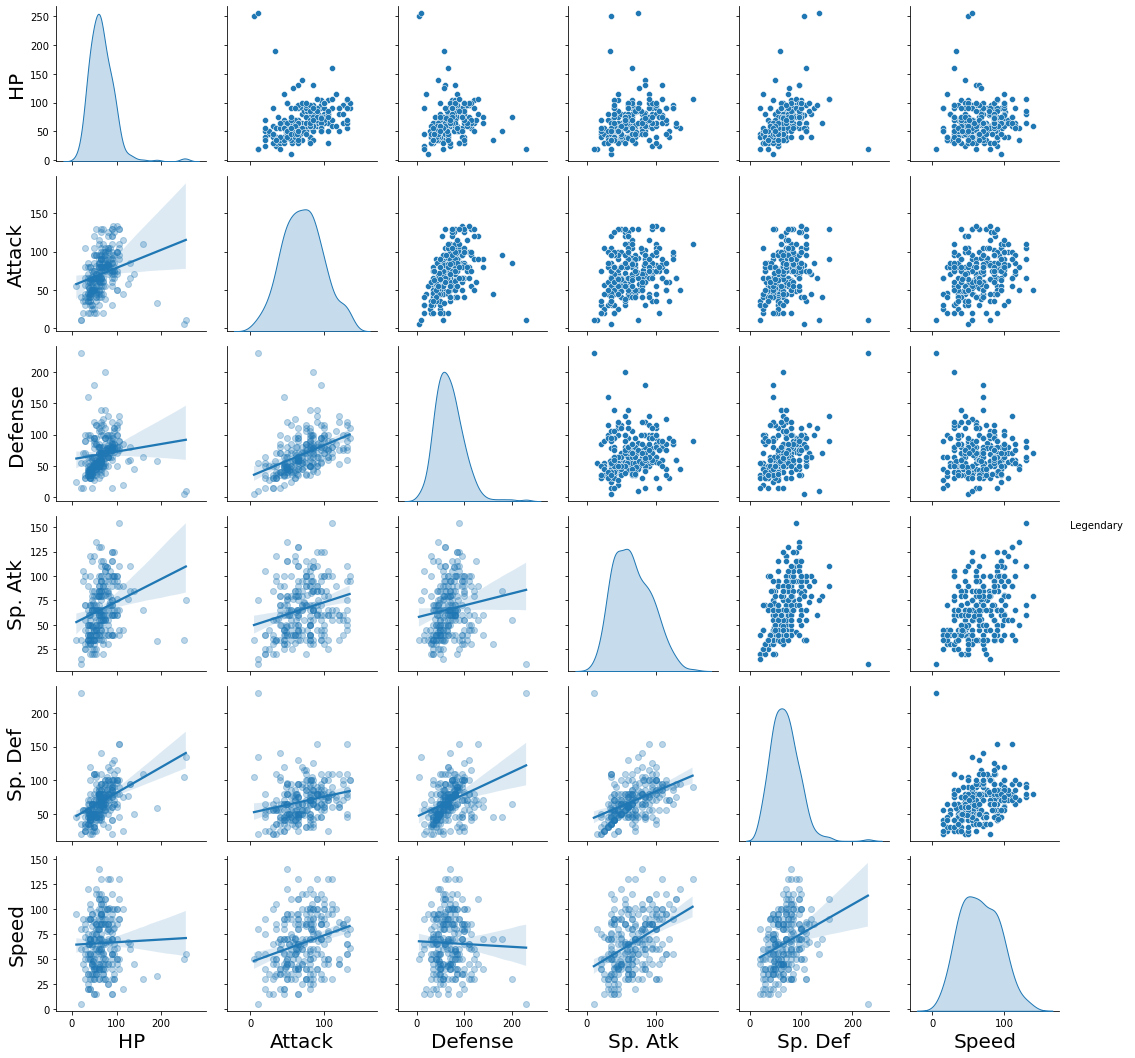

In [13]:
def my_pairgrid(input_df):
    mpl.rcParams["axes.labelsize"] = 20 #Increases the axis titles and the legend size
    g = sns.PairGrid(input_df, vars=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'])
    #https://seaborn.pydata.org/generated/seaborn.kdeplot.html
    g = g.map_diag(sns.kdeplot, shade=True)
    #https://seaborn.pydata.org/generated/seaborn.regplot.html
    g = g.map_lower(sns.regplot, scatter_kws={'alpha':0.3})
    g.hue_vals = input_df["Legendary"]
    g.hue_names = input_df["Legendary"].unique()
    g.palette = sns.color_palette("Set2", len(g.hue_names))
    g = g.map_upper(sns.scatterplot).add_legend(title='Legendary', fontsize= 14)
    return(g)
_ = my_pairgrid(my_pokemon)

Así que analicemos algunos hallazgos de este cuadro general:

  * Los Pokémon legendarios están en el extremo superior del espectro para la mayoría de atributos.
  * Puedo ver algunos signos de una relación positiva entre Ataque y Defensa, Sp.Def y HP, Speed y Attack, así como Speed y Sp.Atk
   * La velocidad parece ser el atributo menos concentrado entre los 6


---

### Correlación entre atributos

Si bien el primer gráfico fue útil, quizás una mejor manera de visualizar la correlación entre atributos es un mapa de calor con un azul más fuerte que indica una correlación más alta.


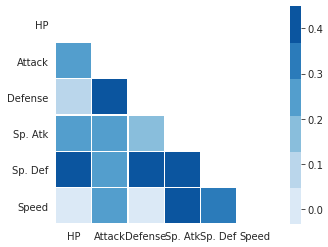

In [14]:
my_corr = my_pokemon.loc[:, 'HP':'Speed'].corr() 
mask = np.zeros_like(my_corr) 
mask[np.triu_indices_from(mask)] = True ## This part is to blank out the upper diagonal
with sns.axes_style("white"):
     ax = sns.heatmap(my_corr, mask=mask, square=True, cmap=sns.color_palette("Blues"), 
                      vmax=np.max(np.sort(my_corr.values)[:,-2]), linewidths=0.3)

# Análisis de atributos por pokemon y tipo

Hagamos un análisis de cómo los atributos varían con el tipo.
Mi primera idea fue usar un Seaborn Swarmplot ya que no tenemos tantos datos que estarán superpoblados.


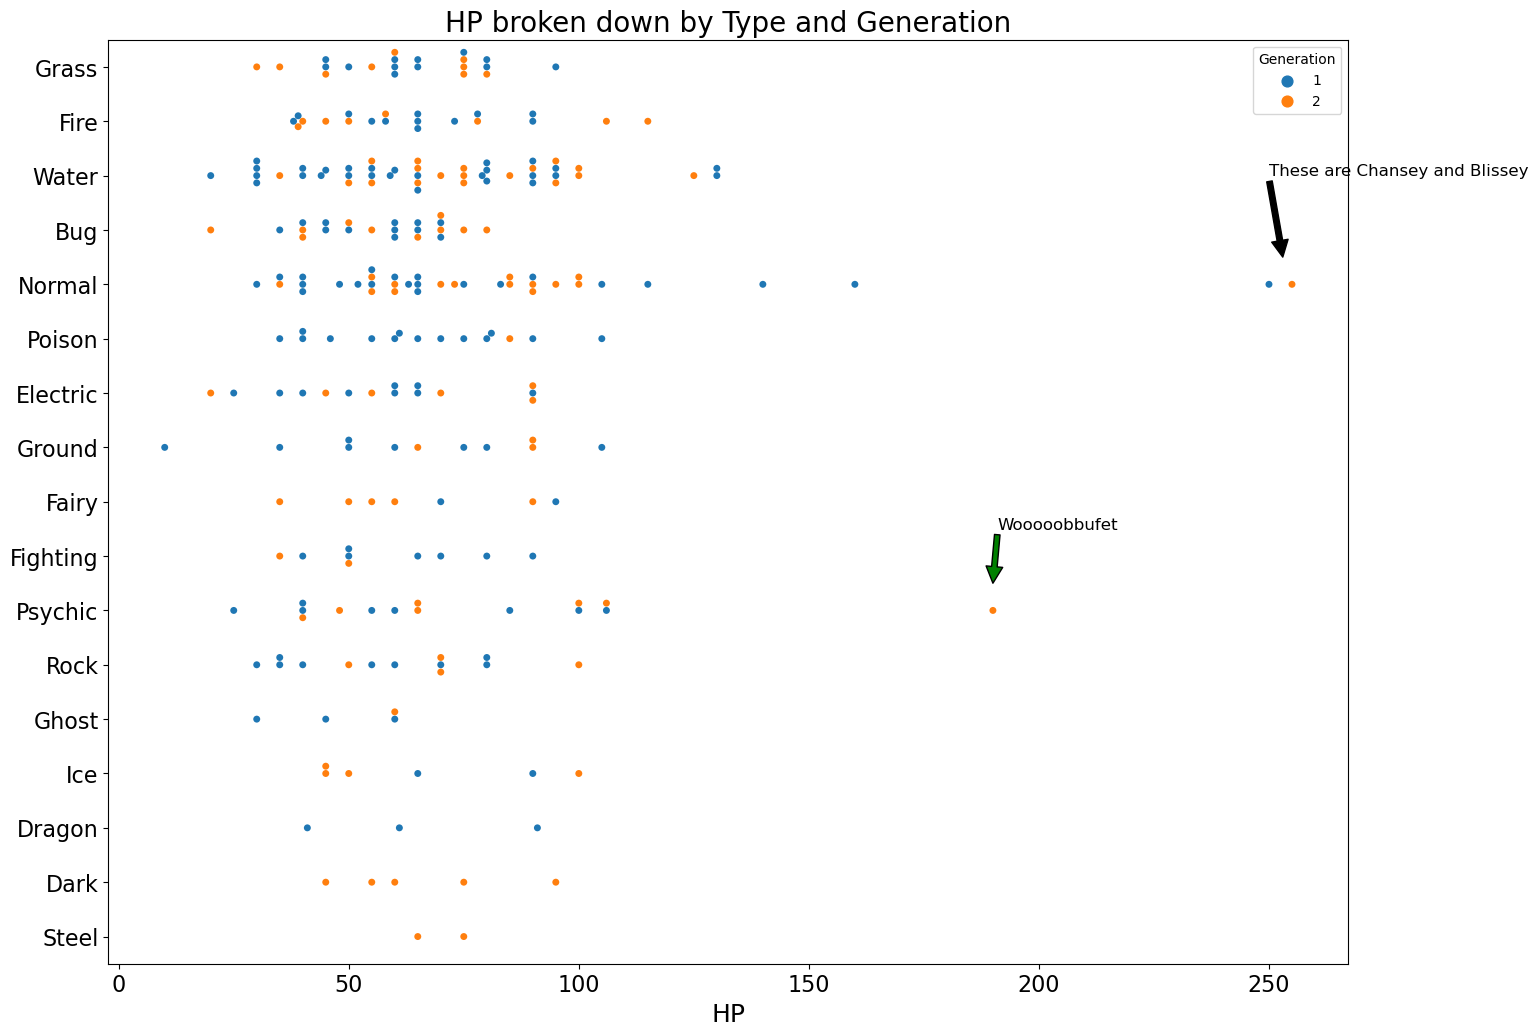

In [15]:
sns.reset_defaults()
plt.figure(figsize=(16,12))
g = sns.swarmplot(x='HP', y='Type 1', hue = 'Generation', data=my_pokemon)
g.yaxis.label.set_visible(False)
g.set_title('HP broken down by Type and Generation')
_ = g.annotate('These are Chansey and Blissey', xy=(253, 3.5), xytext = (250, 2), fontsize = 12, arrowprops=dict(facecolor='black') )
_ = g.annotate('Wooooobbufet', xy=(190, 9.5), xytext = (191, 8.5), fontsize = 12, arrowprops=dict(facecolor='green'))
g.title.set_fontsize(20)
g.xaxis.label.set_fontsize(18)
g.tick_params(axis='x', labelsize=16)
g.tick_params(axis='y', labelsize=16)

Honestamente, el gráfico parece distraer algo, no puedo distinguir mucho... además de los valores atípicos, notamos que hay un tipo de hada. Este no fue el caso en Gens 1 y 2, ¡los Pokémon de hadas eran Pokémon normales!

In [16]:
my_pokemon.loc[my_pokemon['Type 1'] == "Fairy", 'Type 1'] = 'Normal'
my_pokemon.loc[my_pokemon['Type 2'] == "Fairy", 'Type 2'] = np.nan

In [17]:
def attr_per_type(input_df, y_attr, hue_attr):
    mpl.rcParams["font.size"] = 18
    f, axes = plt.subplots(2, 3, figsize=(20, 20))

    poke_attributes = ['HP', 'Defense', 'Sp. Def', 'Speed', 'Attack', 'Sp. Atk']
    counter = 0
    for row in range(2):
        for col in range(3):
            sns.boxplot(y = y_attr, x = poke_attributes[counter], data=input_df, ax=axes[row, col], showfliers=False)
            sns.stripplot(y = y_attr, x = poke_attributes[counter], data=input_df, ax=axes[row, col], hue = hue_attr, palette=['black', 'orange'])
            axes[row, col].set_title(axes[row, col].get_xlabel())
            axes[row, col].xaxis.label.set_visible(False)
            axes[row, col].get_legend().remove()
            counter += 1
            if (col == 0):
                axes[row, col].yaxis.label.set_visible(False)
                continue
            axes[row, col].yaxis.set_visible(False)
    return(f, axes)

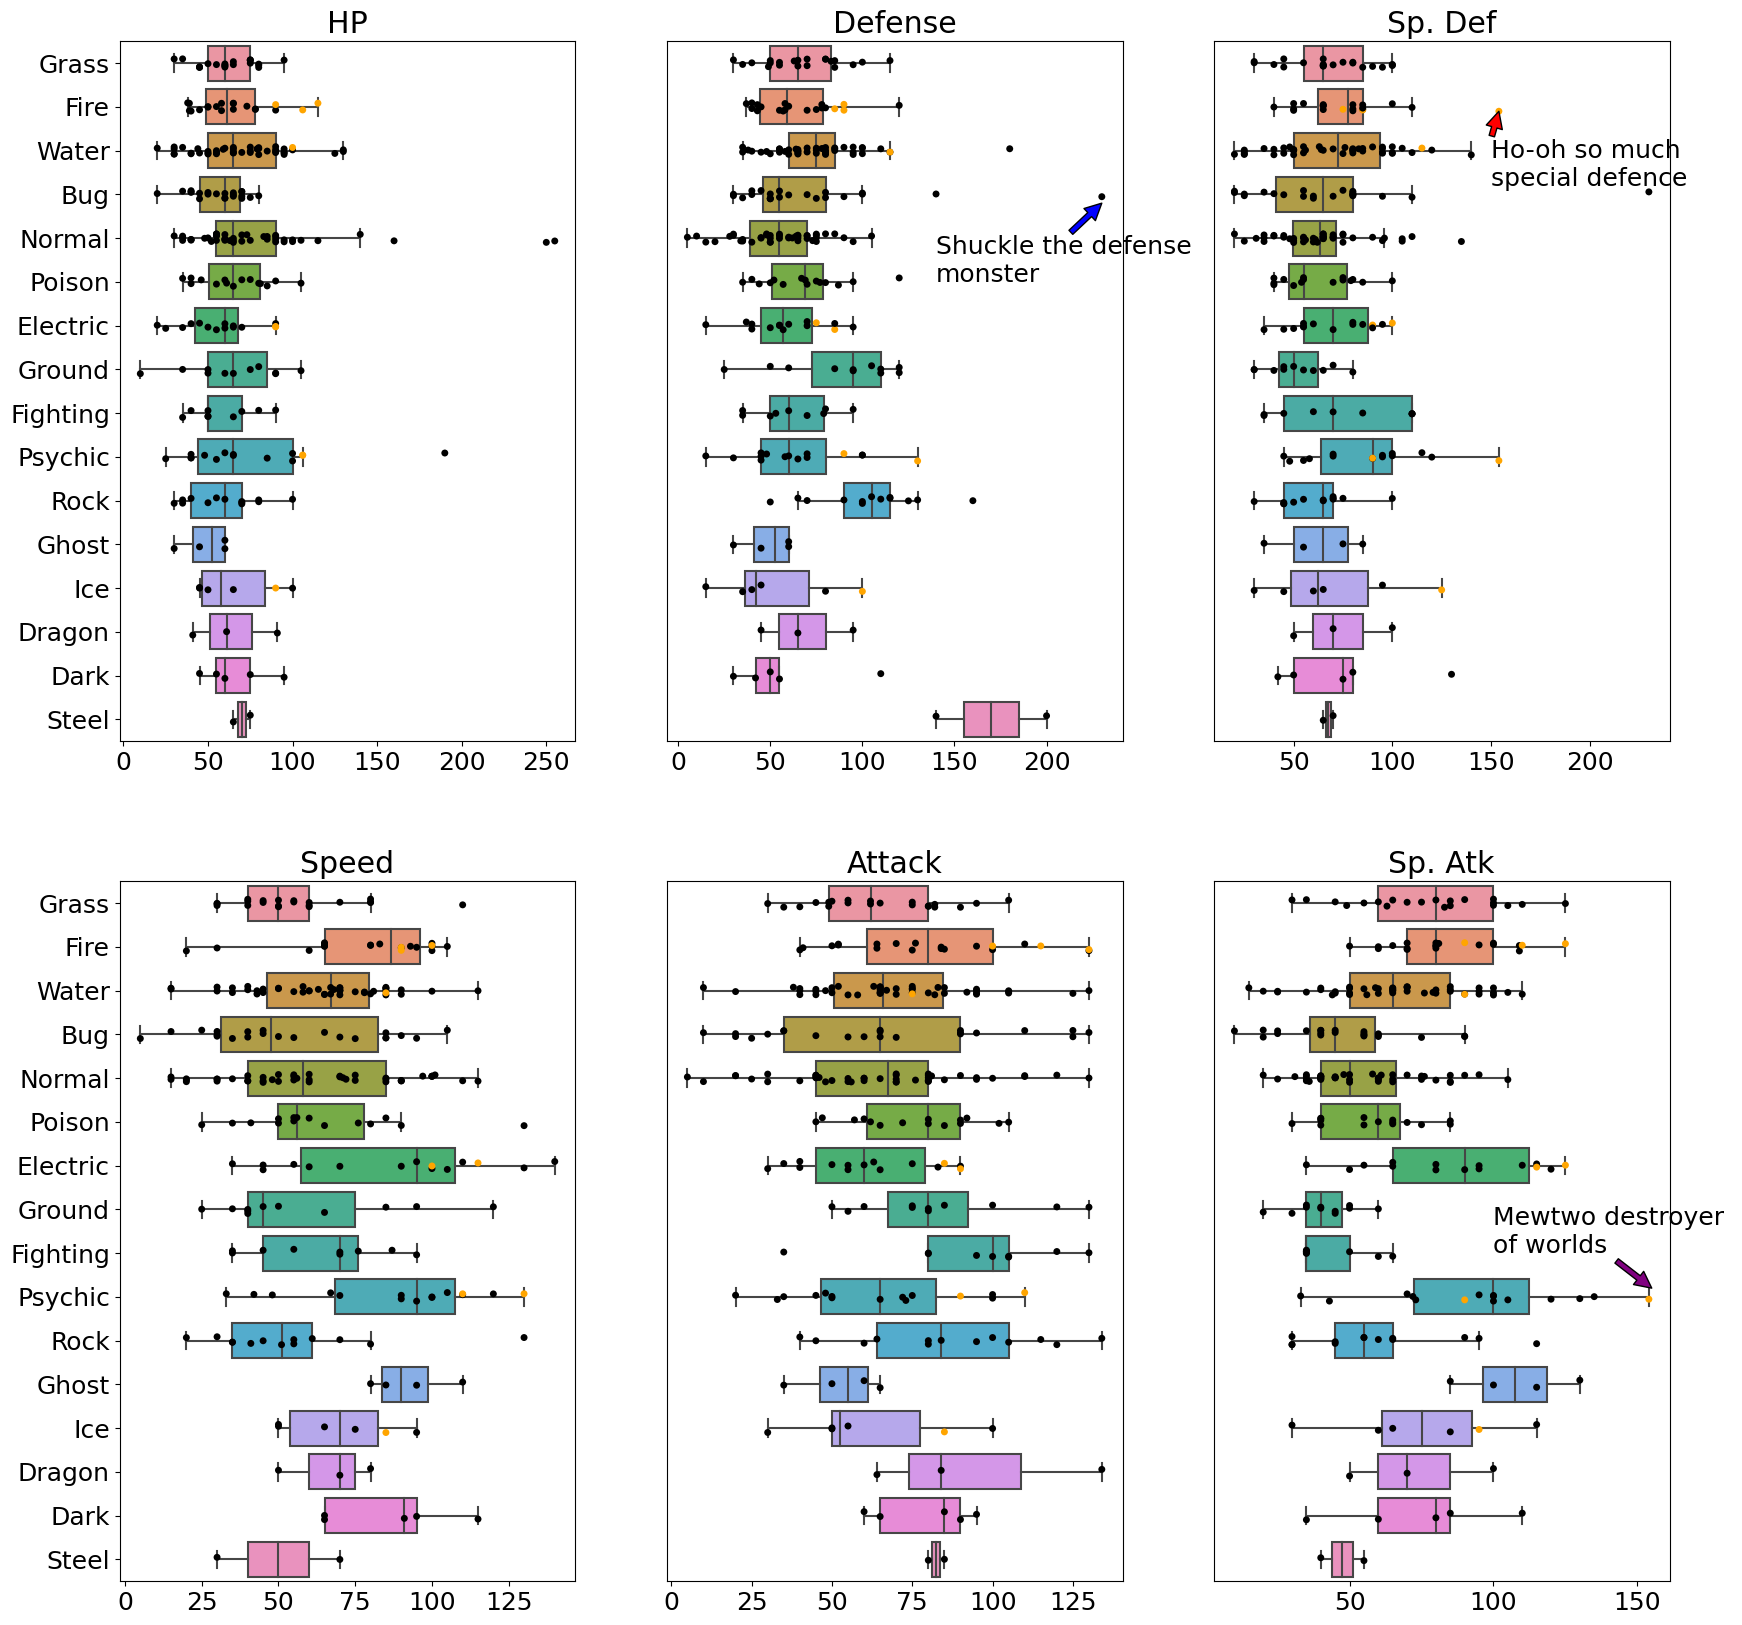

In [18]:
(f, axes) = attr_per_type(my_pokemon, 'Type 1', 'Legendary')
_ = axes[0, 1].annotate('Shuckle the defense \nmonster', xy=(230, 3.2), xytext = (140, 5), arrowprops=dict(facecolor='blue'))
_ = axes[0, 2].annotate('Ho-oh so much \nspecial defence', xy=(154, 1.1), xytext=(150, 2.8), arrowprops=dict(facecolor='red'))
_ = axes[1, 2].annotate('Mewtwo destroyer \nof worlds', xy=(155, 8.8), xytext= (100, 8), arrowprops=dict(facecolor='purple'))

Muy bien, esto se ve mucho mejor! El problema con el conjunto de datos actual es que incluye Pokémon de menor evolución. 

* Por ejemplo, Charmander, Charmeleon y Charizard están todos incluidos.

Preferiría que solo se incluyera el último Pokémon de evolución porque la selección se realiza principalmente en función de esos. Tratemos de solucionar este problema raspando el árbol de evolución de Pokémon del sitio web de pokemondb. 

Voy a desglosar cada paso para que sea más comprensible.
---

### Web scraping para mejorar nuestro conjunto de datos

**Paso 1: encontrar la URL**

El sitio web que elegí es el sitio web de pokemondb que enumera las evoluciones de todos los Pokémon en esta forma:

![img](https://i.postimg.cc/qR8yX0qW/Pika.png)

In [19]:
poke_url = 'https://pokemondb.net/evolution#evo-g2'
response = get(poke_url) 
html_soup = BeautifulSoup(response.text, 'html.parser') ## Getting the html into python

**Paso 2: examinar el HTML de la página y extraer los datos**

Ahora que tenemos el HTML, tenemos que examinar dónde se encuentra exactamente la información que queremos. Podemos utilizar las herramientas de desarrollo de Google Chrome para ver qué parte del árbol HTML nos interesa.

![img](https://i.postimg.cc/qRf8WwFf/Pika-HTML.png)


In [20]:
infocard = html_soup.find_all('div', {'class' : 'infocard-list-evo'})

**Paso 3: localizar y extraer toda la información útil en el HTML**

Ahora que hemos seleccionado todos los divs, necesitamos extraer la información que nos sea útil. Me gustaría obtener la siguiente información:

  *  La evolución es el pokemon (1º, 2º, etc.)
  *  El número de Pokémon (lo necesitaremos en el futuro para filtrar)
  * El texto pequeño debajo del pokemon (nuevamente, esto se usará para filtrar)
  *  El nombre de pokemon

Toda la información que queremos se puede encontrar en el intervalo con la clase 'infocard-lg-data text-muted' como se puede ver en la captura de pantalla a continuación:

![img](https://i.postimg.cc/yxh1vgJp/Info-Pic.png)

Solo necesitamos extraer el primer pequeño (número de pokemon), el segundo pequeño (nombre de pokemon) y la etiqueta a con la clase 'ent-name' que tiene el texto pequeño debajo del pokemon.

También utilizo enumerate para crear un índice de la evolución del pokemon. Entonces, por ejemplo, en los casos simples (Charmander -> Charmeleon -> Charizard) con enumerate logro darle a Charmander el número 1, Charmeleon el número 2 y Charizard el número 3.

Desafortunadamente, esto falla estrepitosamente para los casos complejos (como el de Pikachu) pero trataremos esto en un paso posterior.

In [21]:
raw = []
for chain in infocard:
    raw.append(([(i, x.find('small').getText(), x.find_all('small')[1].getText(), x.find('a', {'class':'ent-name'}).getText(), ) for i, x in enumerate(list(chain.find_all('span', {'class':'infocard-lg-data text-muted'})), 1)]))

raw[:4] ## Our list contains touple lists with the evolution branch of each pokemon. We keep that in mind for our future processing

[[(1, '#001', 'Grass · Poison', 'Bulbasaur'),
  (2, '#002', 'Grass · Poison', 'Ivysaur'),
  (3, '#003', 'Grass · Poison', 'Venusaur')],
 [(1, '#004', 'Fire', 'Charmander'),
  (2, '#005', 'Fire', 'Charmeleon'),
  (3, '#006', 'Fire · Flying', 'Charizard')],
 [(1, '#007', 'Water', 'Squirtle'),
  (2, '#008', 'Water', 'Wartortle'),
  (3, '#009', 'Water', 'Blastoise')],
 [(1, '#010', 'Bug', 'Caterpie'),
  (2, '#011', 'Bug', 'Metapod'),
  (3, '#012', 'Bug · Flying', 'Butterfree')]]

**Paso 4: limpieza del conjunto de datos**

Ahora que hemos extraído los datos, definitivamente necesitamos hacer algunos filtros:

   * Eliminar todos los Pokémon que tienen 'alolan' en su nombre, ya que son de generaciones más nuevas, supongo.
   * Elimina todos los Pokémon con un número superior a 251, ya que estos son nuevamente de generaciones más nuevas.
   * Elimine todas las entradas restantes que tengan 1 o menos entradas de la lista

In [22]:
#And what better way to do all this than list comprehensions! 
step_1 = [[elem for elem in branch_list if 'Alol' not in elem[2]] for branch_list in raw] ## Remove all touples that contain 'Alol' in the small text (removing the second Raichu in our example)
step_2 = [[elem for elem in branch_list if int(elem[1][1:]) <= 251] for branch_list in step_1] ## Remove all pokemon that are after Gen 2 (Number > 251) 
step_3 = [elem for elem in step_2 if len(elem) > 1] ##Remove entries that have a length of 1 or less (remove leftovers that are not actual branches in Gens 1 & 2)

**Paso 5: mejorar nuestro conjunto de datos existente**

Para el análisis me gustaría poder decir qué Pokémon son la última evolución de cada rama y qué Pokémon no tienen evolución (y por lo tanto no se incluyeron en la lista en absoluto). Por ejemplo: Charmander es el primero en el árbol de evolución Charmander-Charmeleon-Charizard y me gustaría excluirlo del análisis. Snorlax por otro lado no tiene evolución y me gustaría incluirlo en el análisis.

Por tanto, me gustaría crear 2 listas, una con todos los pokémon que pertenecen a una rama de evolución y otra con pokémon que son los últimos de una rama de evolución.

In [23]:
## Extract all pokemon that in the raw list
has_evolution = [[elem[3] for elem in branch_list] for branch_list in step_3]
## 'Un-tupple' them -- This is not the optimal way to do this but I find it really 
## really cool and for such a small list it doesn't matter
has_evolution = sum(has_evolution, []) 

In [24]:
last_evolutions  = [x[-1] for x in step_3] ## Take the last entry into each element list
last_evolutions.extend([x[-2] for x in step_3 if x[-1][0] == 4]) # The ones that have 2 end evolutions like Politoed and Poliwrath

## This is the eevee and hitmontop section as they have 5 and 3 final evolutions respecitvely
eevee_and_hitmon = [x[1:] for x in step_3 if (x[0][3] == 'Tyrogue') or (x[0][3] ==  'Eevee')]
eevee_and_hitmon = sum(eevee_and_hitmon, [])
last_evolutions.extend(eevee_and_hitmon)

last_evo_df = pd.DataFrame([[int(x[1][1:]), x[3]] for x in last_evolutions], columns=['Number', 'Pokemon'] )
last_evo_df = last_evo_df.drop_duplicates() ## Remove duplicates because some hitmontop and eevee evolutions have been added more than once in the process

Estamos al final del proceso, tenemos una lista de Pokémon que pertenecen a una rama de evolución y también tenemos una lista de Pokémon que son las últimas evoluciones. Sigamos adelante y actualicemos nuestro conjunto de datos inicial

In [25]:
my_pokemon['Has_evol'] = my_pokemon.Name.isin(has_evolution)
my_pokemon['Last_evol'] = my_pokemon.Name.isin(last_evo_df.Pokemon)
my_evolved_pokemon = my_pokemon.loc[(my_pokemon.Last_evol == True) | (my_pokemon.Has_evol == False)].copy()

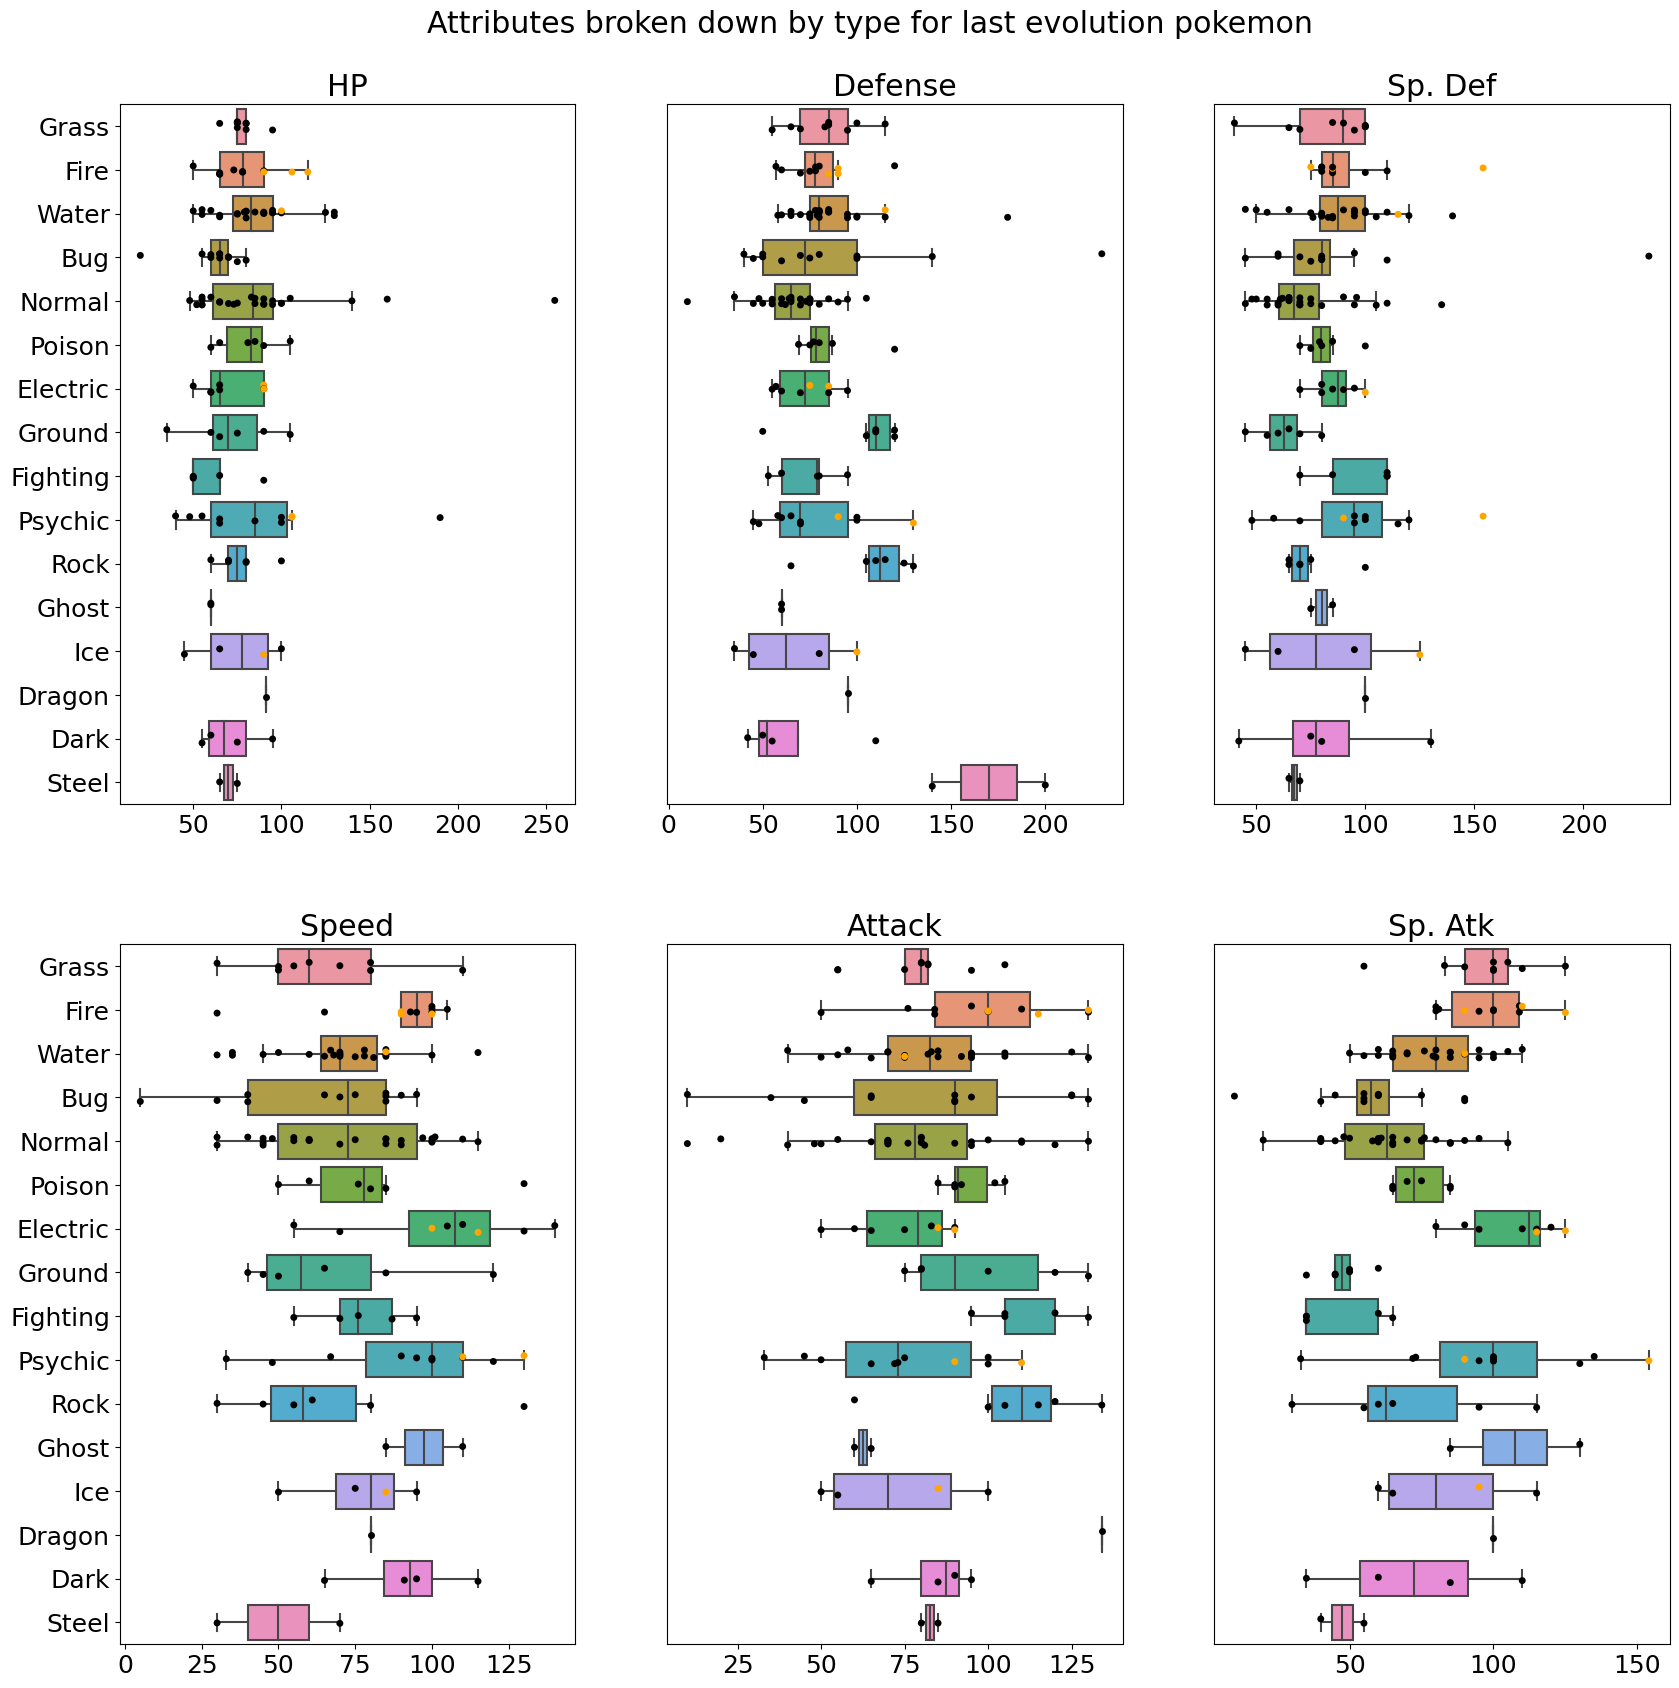

In [26]:
(f, axes) = attr_per_type(my_evolved_pokemon, 'Type 1', 'Legendary')
_ = f.suptitle('Attributes broken down by type for last evolution pokemon', va='center', y=0.92)

Estos son los Pokémon reales que podrían usarse en una batalla de Pokémon, ya que tener una evolución significa que tus estadísticas aumentarán y tendrás acceso a un grupo de movimientos más amplio.

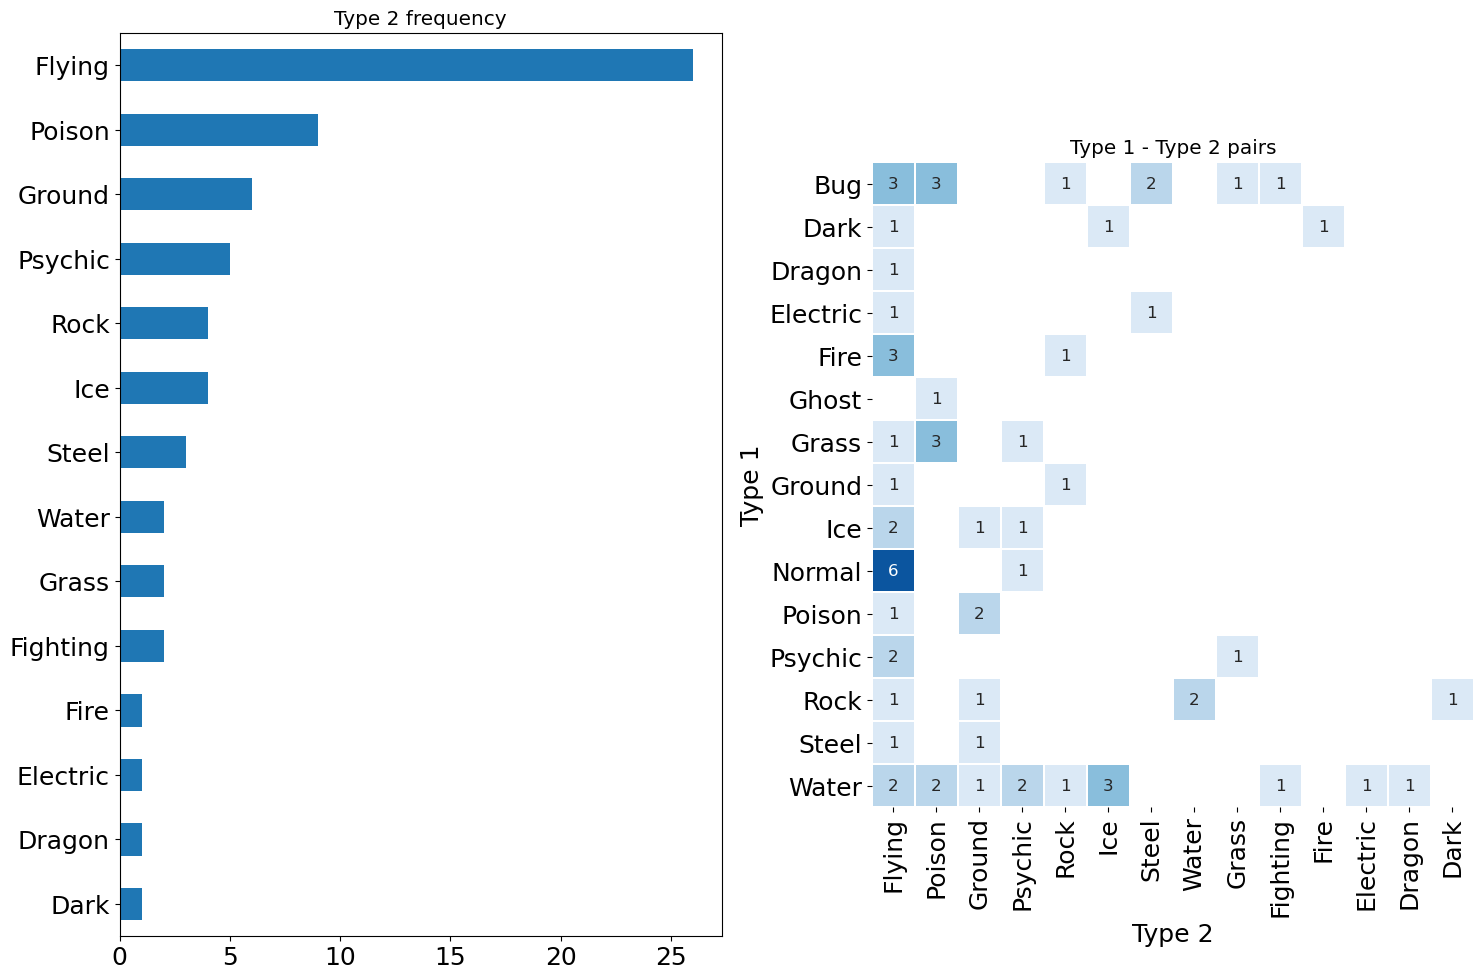

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
mpl.rcParams["font.size"] = 12

ax1 = my_evolved_pokemon.groupby('Type 2').size().sort_values().plot(kind='barh', ax=ax1)
start, end = ax1.get_xlim()
ax1.xaxis.set_ticks(np.arange(start, end, 5))
ax1.axes.get_yaxis().get_label().set_visible(False)
_ = ax1.set_title('Type 2 frequency')

pivot_dat = my_evolved_pokemon.pivot_table(index='Type 1', columns='Type 2', aggfunc = 'size')
pivot_dat = pivot_dat[pivot_dat.sum().sort_values(ascending = False).index] #Reordering
ax2 = sns.heatmap(pivot_dat, annot=True, square=True, cmap=sns.color_palette("Blues"), cbar=False, linewidths=0.3, ax=ax2)
_ = ax2.set_title('Type 1 - Type 2 pairs')
fig.tight_layout()

In [28]:
my_evolved_pokemon['New type'] = my_evolved_pokemon['Type 1']
my_evolved_pokemon['Dual type'] = ~pd.isnull(my_pokemon['Type 2'])
dual_evolved_pokemon = my_evolved_pokemon.append(my_evolved_pokemon[my_evolved_pokemon['Dual type']==True], ignore_index=True)

#Change the second instance of the pokemon to have the second type
dual_evolved_pokemon.loc[dual_evolved_pokemon.duplicated(), 'New type'] = dual_evolved_pokemon.loc[dual_evolved_pokemon.duplicated(), 'Type 2'] 

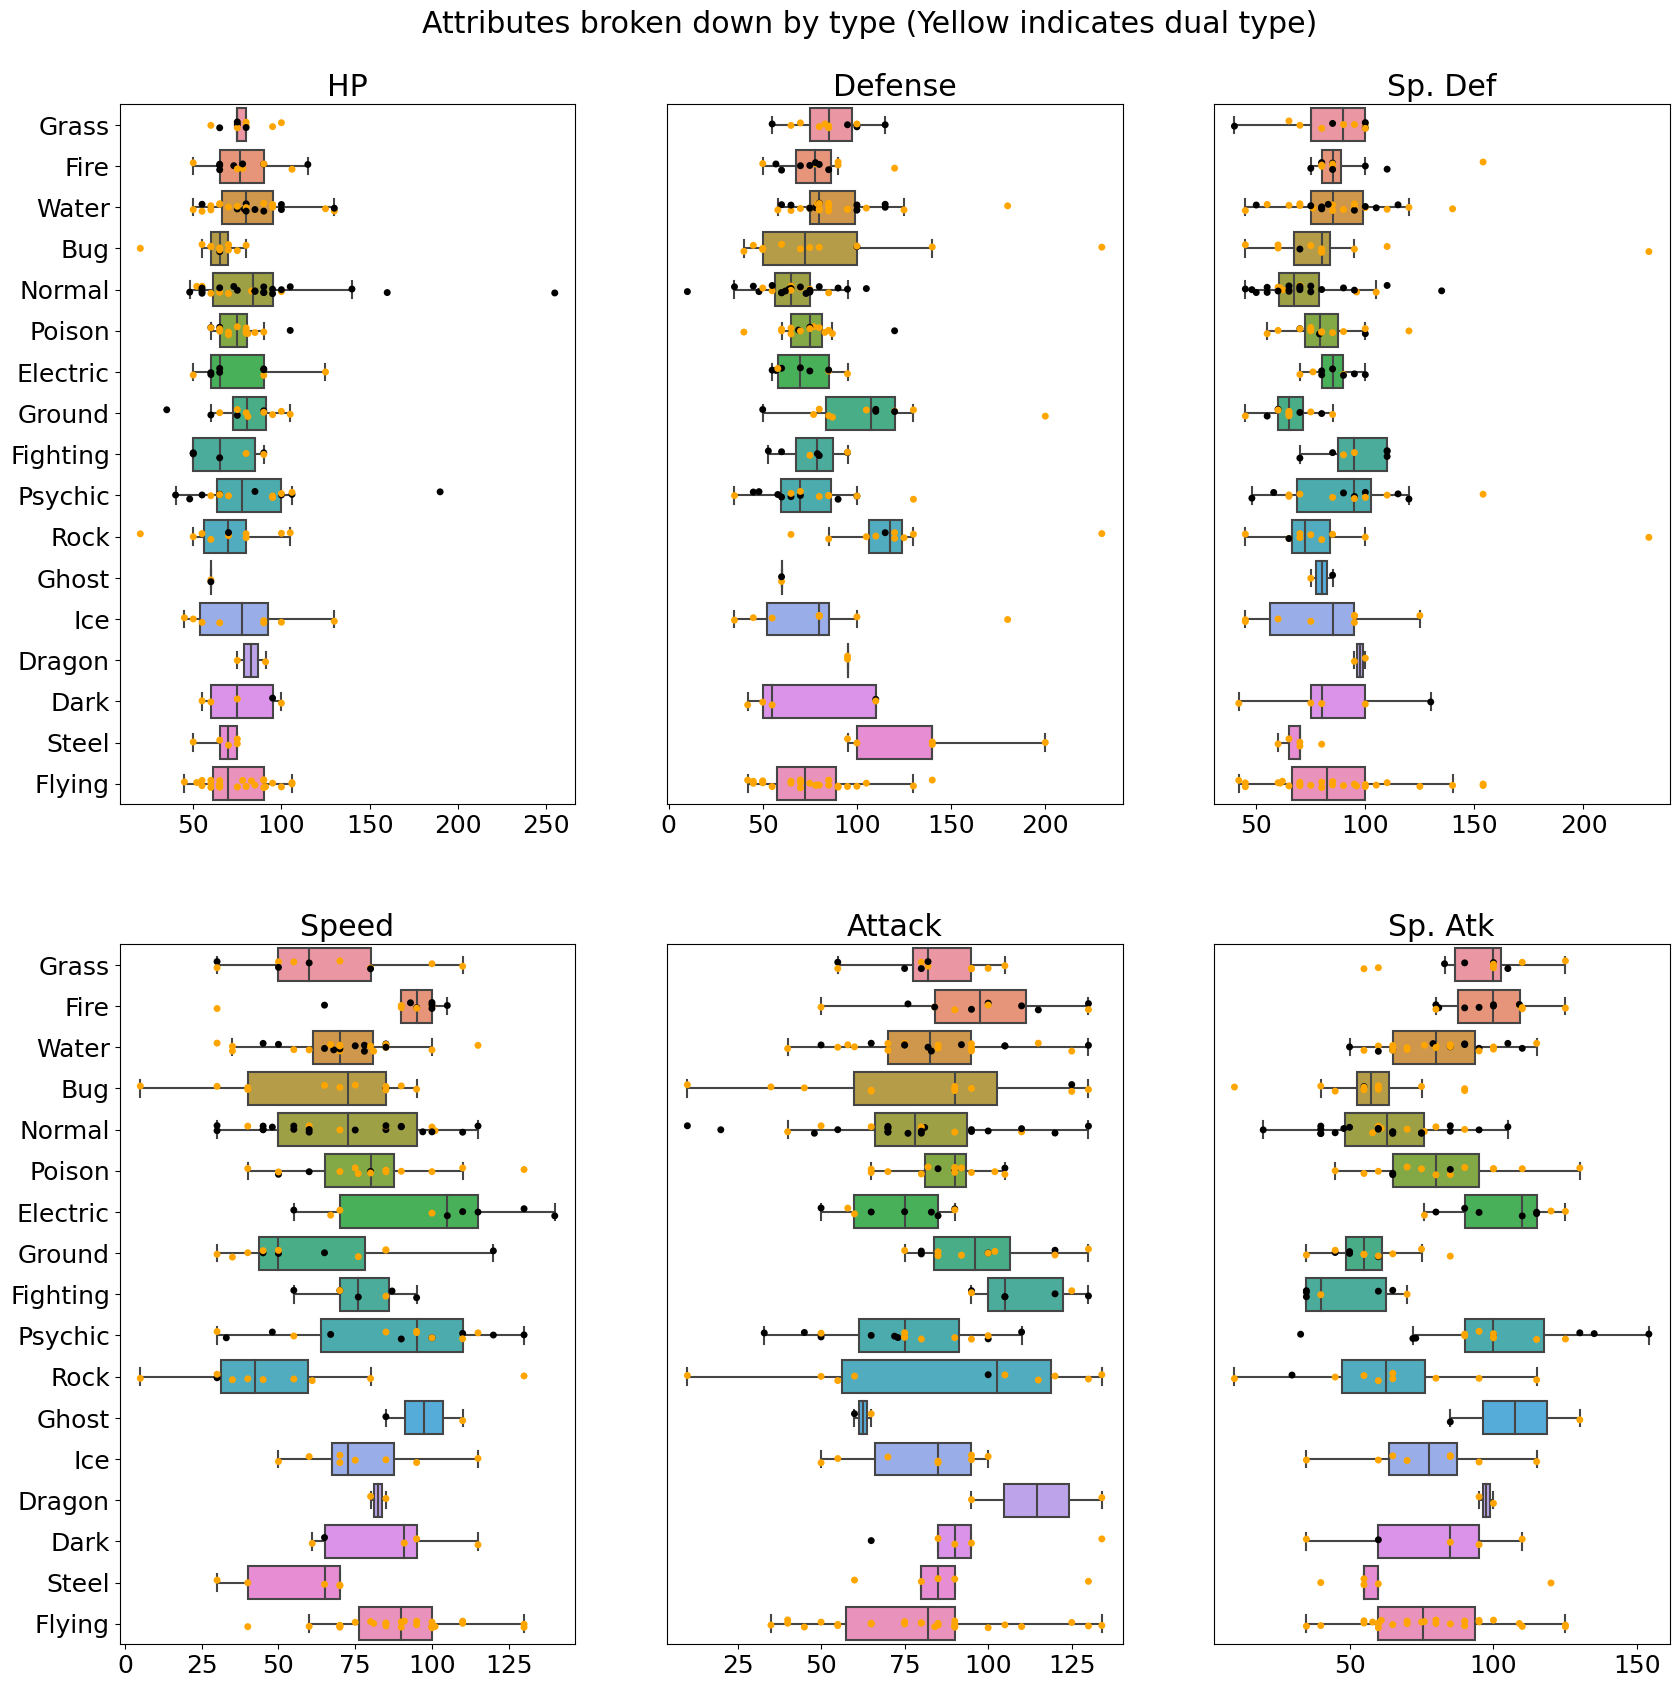

In [29]:
(f, axes) = attr_per_type(dual_evolved_pokemon, 'New type', 'Dual type')
_ = f.suptitle("Attributes broken down by type (Yellow indicates dual type)", va='center', y=0.92)

# Modelos para saber si son o no legendarios

In [30]:
my_pokemon.Legendary.unique()

array([False,  True])

Separamos en dos conjuntos de datos: Y para la columna de legendarios y en este punto, X para todo lo demás

In [31]:
X = my_pokemon.drop(columns =['Name', 'Type 1', 'Type 2', 'Generation', 'Legendary', 'Has_evol', 'Last_evol'])
y = my_pokemon['Legendary']

In [32]:
X

Total   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
0      318   45      49       49       65       65     45
1      405   60      62       63       80       80     60
2      525   80      82       83      100      100     80
4      309   39      52       43       60       50     65
5      405   58      64       58       80       65     80
..     ...  ...     ...      ...      ...      ...    ...
266    410   70      84       70       65       70     51
267    600  100     134      110       95      100     61
269    680  106      90      130       90      154    110
270    680  106     130       90      110      154     90
271    600  100     100      100      100      100    100

[251 rows x 7 columns]

In [33]:
y

0      False
1      False
2      False
4      False
5      False
       ...  
266    False
267    False
269     True
270     True
271    False
Name: Legendary, Length: 251, dtype: bool

In [34]:
from sklearn.model_selection import train_test_split

#Recordemos que si no instanciamos una semilla, cada ejecución 
#será un split diferente
X_train, X_test, y_train, y_test = train_test_split(X, y) # 75% y 25%

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(188, 7)
(63, 7)
(188,)
(63,)


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble import RandomForestClassifier as RF

alg1 = LogisticRegression()
alg2 = SVC(kernel = 'rbf') #lineal , polinomial, radial basis fuction (gaussiano)
alg3 = RF()
alg4 = DT()

In [37]:
from sklearn.metrics import accuracy_score
alg1.fit(X_train, y_train) #Training the model

pd.DataFrame({"Accurancy on Train":[accuracy_score(y_train, alg1.predict(X_train))],
    "Accurancy on Test":[accuracy_score(y_test, alg1.predict(X_test))]})

Accurancy on Train  Accurancy on Test
0            0.978723           0.984127

In [38]:
alg2.fit(X_train, y_train) #Training the model
pd.DataFrame({"Accurancy on Train":[accuracy_score(y_train, alg2.predict(X_train))],
    "Accurancy on Test":[accuracy_score(y_test, alg2.predict(X_test))]})


Accurancy on Train  Accurancy on Test
0            0.973404           0.984127

In [39]:
alg3.fit(X_train, y_train) #Training the model
pd.DataFrame({"Accurancy on Train":[accuracy_score(y_train, alg3.predict(X_train))],
    "Accurancy on Test":[accuracy_score(y_test, alg3.predict(X_test))]})

Accurancy on Train  Accurancy on Test
0                 1.0           0.984127

In [40]:
alg4.fit(X_train, y_train) #Training the model
pd.DataFrame({"Accurancy on Train":[accuracy_score(y_train, alg4.predict(X_train))],
    "Accurancy on Test":[accuracy_score(y_test, alg4.predict(X_test))]})

Accurancy on Train  Accurancy on Test
0                 1.0                1.0

# Probemos los algoritmos!

![img](http://static.pokemonpets.com/images/monsters-images-800-800/8493-Mega-Arceus.png)

Las siguientes características corresponden a un Pokemon de generación diferente...

In [41]:
test = np.array([[720.0,120.0,120.0,120.0,120.0,120.0,120.0]])

In [42]:
alg1.predict(test)[0]

True

In [43]:
alg2.predict(test)[0]

True

In [44]:
alg3.predict(test)[0]

True

In [45]:
alg4.predict(test)[0]

False

Parece que todos han predicho que efectivamente es "Legendario" en esta ronda... Pero Arceus no es un pokemon legendario! corresponde a otra clasificación... que veremos más adelante

### Implementando perceptrón

In [46]:
from sklearn.linear_model import Perceptron

In [47]:
# Un perceptrón con las siguientes características y deberán entrenarlo
ppn = Perceptron(eta0=0.001)
ppn.fit(X_train, y_train)

Perceptron(eta0=0.001)

In [48]:
# Ahora, debemos hacer la predicción...
y_pred = ppn.predict(X_test)

In [49]:
y_pred

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [50]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.98


In [51]:
ppn.predict(test)[0]

False

Parece que nuestro perceptrón da un resultado diferente...

### Extender ejercicio para otras categorías usando pokedex_v2

In [52]:
pkdx = pd.read_csv('https://raw.githubusercontent.com/jhermosillo/DIPLOMADO_CDP/main/02_Analisis_Estadistico/data/pokedex_v2.csv')

In [53]:
pkdx

pokedex_number                            Name    type_1  type_2  \
0                  1                       Bulbasaur     Grass  Poison   
1                  2                         Ivysaur     Grass  Poison   
2                  3                        Venusaur     Grass  Poison   
3                  3                   Mega Venusaur     Grass  Poison   
4                  4                      Charmander      Fire     NaN   
...              ...                             ...       ...     ...   
1023             888     Zacian Hero of Many Battles     Fairy     NaN   
1024             889        Zamazenta Crowned Shield  Fighting   Steel   
1025             889  Zamazenta Hero of Many Battles  Fighting     NaN   
1026             890                       Eternatus    Poison  Dragon   
1027             890             Eternatus Eternamax    Poison  Dragon   

      total_points   hp  attack  defense  sp_attack  sp_defense  speed  \
0              318   45      49       49         65          65     45   
1              405   60      62       63         80          80     60   
2              525   80      82       83        100         100     80   
3              625   80     100      123        122         120     80   
4              309   39      52       43         60          50     65   
...            ...  ...     ...      ...        ...         ...    ...   
1023           670   92     130      115         80         115    138   
1024           720   92     130      145         80         145    128   
1025           670   92     130      115         80         115    138   
1026           690  140      85       95        145          95    130   
1027          1125  255     115      250        125         250    130   

      generation     status  
0              1     Normal  
1              1     Normal  
2              1     Normal  
3              1     Normal  
4              1     Normal  
...          ...        ...  
1023           8  Legendary  
1024           8  Legendary  
1025           8  Legendary  
1026           8  Legendary  
1027           8  Legendary  

[1028 rows x 13 columns]

In [54]:
result = pd.merge(pokemon, pkdx, on=['Name'])
result

Name  Type 1  Type 2  Total   HP  Attack  Defense  Sp. Atk  \
0     Bulbasaur   Grass  Poison    318   45      49       49       65   
1       Ivysaur   Grass  Poison    405   60      62       63       80   
2      Venusaur   Grass  Poison    525   80      82       83      100   
3    Charmander    Fire     NaN    309   39      52       43       60   
4    Charmeleon    Fire     NaN    405   58      64       58       80   
..          ...     ...     ...    ...  ...     ...      ...      ...   
699     Noivern  Flying  Dragon    535   85      70       80       97   
700     Xerneas   Fairy     NaN    680  126     131       95      131   
701     Yveltal    Dark  Flying    680  126     131       95      131   
702     Diancie    Rock   Fairy    600   50     100      150      100   
703   Volcanion    Fire   Water    600   80     110      120      130   

     Sp. Def  Speed  ...  type_2  total_points   hp attack defense  sp_attack  \
0         65     45  ...  Poison           318   45     49      49         65   
1         80     60  ...  Poison           405   60     62      63         80   
2        100     80  ...  Poison           525   80     82      83        100   
3         50     65  ...     NaN           309   39     52      43         60   
4         65     80  ...     NaN           405   58     64      58         80   
..       ...    ...  ...     ...           ...  ...    ...     ...        ...   
699       80    123  ...  Dragon           535   85     70      80         97   
700       98     99  ...     NaN           680  126    131      95        131   
701       98     99  ...  Flying           680  126    131      95        131   
702      150     50  ...   Fairy           600   50    100     150        100   
703       90     70  ...   Water           600   80    110     120        130   

     sp_defense  speed  generation     status  
0            65     45           1     Normal  
1            80     60           1     Normal  
2           100     80           1     Normal  
3            50     65           1     Normal  
4            65     80           1     Normal  
..          ...    ...         ...        ...  
699          80    123           6     Normal  
700          98     99           6  Legendary  
701          98     99           6  Legendary  
702         150     50           6   Mythical  
703          90     70           6   Mythical  

[704 rows x 24 columns]

In [55]:
X = result[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
y = result['status']

In [56]:
X

Total   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
0      318   45      49       49       65       65     45
1      405   60      62       63       80       80     60
2      525   80      82       83      100      100     80
3      309   39      52       43       60       50     65
4      405   58      64       58       80       65     80
..     ...  ...     ...      ...      ...      ...    ...
699    535   85      70       80       97       80    123
700    680  126     131       95      131       98     99
701    680  126     131       95      131       98     99
702    600   50     100      150      100      150     50
703    600   80     110      120      130       90     70

[704 rows x 7 columns]

In [57]:
y

0         Normal
1         Normal
2         Normal
3         Normal
4         Normal
         ...    
699       Normal
700    Legendary
701    Legendary
702     Mythical
703     Mythical
Name: status, Length: 704, dtype: object

Repetimos lo anterior pero ahora con nuevas clasificaciones...

In [58]:
from sklearn.model_selection import train_test_split

#Recordemos que si no instanciamos una semilla, cada ejecución 
#será un split diferente
X_train, X_test, y_train, y_test = train_test_split(X, y) # 75% y 25%

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble import RandomForestClassifier as RF

alg1 = LogisticRegression()
alg2 = SVC(kernel = 'rbf') #lineal , polinomial, radial basis fuction (gaussiano)
alg3 = RF()
alg4 = DT()

In [60]:
alg1.fit(X_train, y_train) #Training the model
pd.DataFrame({"Accurancy on Train":[accuracy_score(y_train, alg1.predict(X_train))],
    "Accurancy on Test":[accuracy_score(y_test, alg1.predict(X_test))]})

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accurancy on Train  Accurancy on Test
0            0.943182           0.909091

In [61]:
alg2.fit(X_train, y_train) #Training the model
pd.DataFrame({"Accurancy on Train":[accuracy_score(y_train, alg2.predict(X_train))],
    "Accurancy on Test":[accuracy_score(y_test, alg2.predict(X_test))]})

Accurancy on Train  Accurancy on Test
0            0.964015           0.926136

In [62]:
alg3.fit(X_train, y_train) #Training the model
pd.DataFrame({"Accurancy on Train":[accuracy_score(y_train, alg3.predict(X_train))],
    "Accurancy on Test":[accuracy_score(y_test, alg3.predict(X_test))]})

Accurancy on Train  Accurancy on Test
0                 1.0           0.971591

In [63]:
alg4.fit(X_train, y_train) #Training the model
pd.DataFrame({"Accurancy on Train":[accuracy_score(y_train, alg4.predict(X_train))],
    "Accurancy on Test":[accuracy_score(y_test, alg4.predict(X_test))]})

Accurancy on Train  Accurancy on Test
0                 1.0           0.965909

In [64]:
alg1.predict(test)[0]

'Normal'

In [88]:
print(alg1.predict(test)[1])
print(alg2.predict(test)[0])
print(alg3.predict(test)[0])
print(alg4.predict(test)[0])

IndexError: index 1 is out of bounds for axis 0 with size 1

In [65]:
alg2.predict(test)[0]

'Legendary'

In [66]:
alg3.predict(test)[0]

'Mythical'

In [67]:
alg4.predict(test)[0]

'Mythical'

Parece que los únicos que dicen que es "Mítico" son el algoritmo 3 y 4!

In [68]:
# Un perceptrón con las siguientes características y deberán entrenarlo
ppn = Perceptron(eta0=0.001)
ppn.fit(X_train, y_train)

Perceptron(eta0=0.001)

In [69]:
# Ahora, debemos hacer la predicción...
y_pred = ppn.predict(X_test)

In [70]:
ppn.predict(test)[0]

'Normal'

Como podemos apreciar, el conjunto de datos se encuentra bastante desbalanceado...

In [71]:
result.groupby('status').generation.describe()

count      mean       std  min  25%  50%  75%  max
status                                                           
Legendary       13.0  3.769231  1.589227  1.0  3.0  4.0  5.0  6.0
Mythical        11.0  4.000000  1.549193  1.0  3.5  4.0  5.0  6.0
Normal         660.0  3.263636  1.673740  1.0  2.0  3.0  5.0  6.0
Sub Legendary   20.0  3.150000  1.308877  1.0  2.0  3.0  4.0  5.0

In [72]:
#https://imbalanced-learn.org/stable/
!pip install imbalanced-learn

In [73]:
#https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html
from imblearn.over_sampling import RandomOverSampler

Esto significa que si la clase mayoritaria tuviera 1000 ejemplos y la clase minoritaria 100, esta estrategia sobremuestrearía la clase minoritaria para que tenga 1000 ejemplos. En este caso, "Mítico" terminará con 660 muestras como lo que contiene "Normal".

In [74]:
oversample = RandomOverSampler(sampling_strategy='minority')

In [75]:
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)

In [113]:
X_over.describe()

Total           HP       Attack      Defense      Sp. Atk  \
count  1353.000000  1353.000000  1353.000000  1353.000000  1353.000000   
mean    505.232816    78.317812    87.742794    86.605322    87.404287   
std     128.220547    25.173736    26.203721    29.489333    30.685292   
min     180.000000     1.000000     5.000000     5.000000    10.000000   
25%     410.000000    60.000000    70.000000    65.000000    62.000000   
50%     528.000000    77.000000    95.000000    90.000000   100.000000   
75%     600.000000   100.000000   100.000000   100.000000   105.000000   
max     720.000000   255.000000   165.000000   230.000000   154.000000   

           Sp. Def        Speed  
count  1353.000000  1353.000000  
mean     84.667406    80.495196  
std      27.982908    28.738366  
min      20.000000     5.000000  
25%      65.000000    57.000000  
50%      90.000000    85.000000  
75%     100.000000   100.000000  
max     230.000000   160.000000

In [76]:
a = pd.DataFrame(X_over)
b = pd.DataFrame(y_over)

In [77]:
frames = [a, b]
result = pd.concat(frames, axis=1)

In [78]:
result

Total   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed    status
0       318   45      49       49       65       65     45    Normal
1       405   60      62       63       80       80     60    Normal
2       525   80      82       83      100      100     80    Normal
3       309   39      52       43       60       50     65    Normal
4       405   58      64       58       80       65     80    Normal
...     ...  ...     ...      ...      ...      ...    ...       ...
1348    600   50     100      150      100      150     50  Mythical
1349    600   71     120       95      120       95     99  Mythical
1350    480   80      80       80       80       80     80  Mythical
1351    600  100     100      100      100      100    100  Mythical
1352    600  100     100      100      100      100    100  Mythical

[1353 rows x 8 columns]

In [79]:
result.groupby('status').describe()

Total                                                      \
               count        mean        std    min     25%    50%    75%   
status                                                                     
Legendary       13.0  676.923077   6.304252  660.0  680.00  680.0  680.0   
Mythical       660.0  598.363636  50.966869  480.0  600.00  600.0  600.0   
Normal         660.0  401.469697  97.358827  180.0  314.75  407.0  490.0   
Sub Legendary   20.0  588.500000  20.844032  580.0  580.00  580.0  585.0   

                         HP              ... Sp. Def         Speed             \
                 max  count        mean  ...     75%    max  count       mean   
status                                   ...                                    
Legendary      680.0   13.0  106.923077  ...  120.00  154.0   13.0  97.538462   
Mythical       720.0  660.0   88.493939  ...  100.00  150.0  660.0  95.604545   
Normal         670.0  660.0   66.262121  ...   80.00  230.0  660.0  63.171212   
Sub Legendary  670.0   20.0   89.950000  ...  129.25  200.0   20.0  91.050000   

                                                            
                     std   min    25%    50%    75%    max  
status                                                      
Legendary      11.450003  90.0  90.00   95.0   99.0  130.0  
Mythical       19.533240  50.0  80.00  100.0  100.0  125.0  
Normal         26.397442   5.0  44.00   60.0   80.0  160.0  
Sub Legendary  21.112418  50.0  83.75   97.5  108.0  115.0  

[4 rows x 56 columns]

Por ejemplo, un conjunto de datos con 1000 ejemplos en la clase mayoritaria y 100 ejemplos en la clase minoritaria se submuestreará de modo que ambas clases tengan 100 ejemplos en el conjunto de datos de entrenamiento transformado.


In [80]:
from imblearn.under_sampling import RandomUnderSampler

In [81]:
undersample = RandomUnderSampler(sampling_strategy='majority')

Luego, la transformación puede ajustarse y aplicarse a un conjunto de datos en un solo paso llamando a la función fit_resample () y pasando el conjunto de datos sin transformar como argumentos.

In [82]:
# fit and apply the transform
X_under, y_under = undersample.fit_resample(X, y)

In [83]:
a = pd.DataFrame(X_under)
b = pd.DataFrame(y_under)

In [84]:
frames = [a, b]
result = pd.concat(frames, axis=1)

In [85]:
result.groupby('status').describe()

Total                                                      \
              count        mean         std    min    25%    50%    75%   
status                                                                    
Legendary      13.0  676.923077    6.304252  660.0  680.0  680.0  680.0   
Mythical       11.0  600.000000   53.665631  480.0  600.0  600.0  600.0   
Normal         11.0  421.363636  113.381015  237.0  354.0  461.0  489.5   
Sub Legendary  20.0  588.500000   20.844032  580.0  580.0  580.0  585.0   

                        HP              ... Sp. Def        Speed             \
                 max count        mean  ...     75%    max count       mean   
status                                  ...                                   
Legendary      680.0  13.0  106.923077  ...  120.00  154.0  13.0  97.538462   
Mythical       720.0  11.0   88.272727  ...  100.00  150.0  11.0  94.909091   
Normal         535.0  11.0   68.818182  ...   85.00  116.0  11.0  60.454545   
Sub Legendary  670.0  20.0   89.950000  ...  129.25  200.0  20.0  91.050000   

                                                            
                     std   min    25%    50%    75%    max  
status                                                      
Legendary      11.450003  90.0  90.00   95.0   99.0  130.0  
Mythical       21.309409  50.0  89.50  100.0  100.0  125.0  
Normal         35.750143  20.0  27.50   60.0   74.0  130.0  
Sub Legendary  21.112418  50.0  83.75   97.5  108.0  115.0  

[4 rows x 56 columns]

Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o las diferencias en la precisión numérica. Considera ejecutar el ejemplo varias veces y compara el resultado promedio.

El modelo elegido y la configuración de remuestreo son arbitrarios, diseñados para proporcionar una plantilla que puede usar para probar el submuestreo con su conjunto de datos y algoritmo de aprendizaje en lugar de resolver de manera óptima el conjunto de datos sintéticos.

# Comparación entre tipos

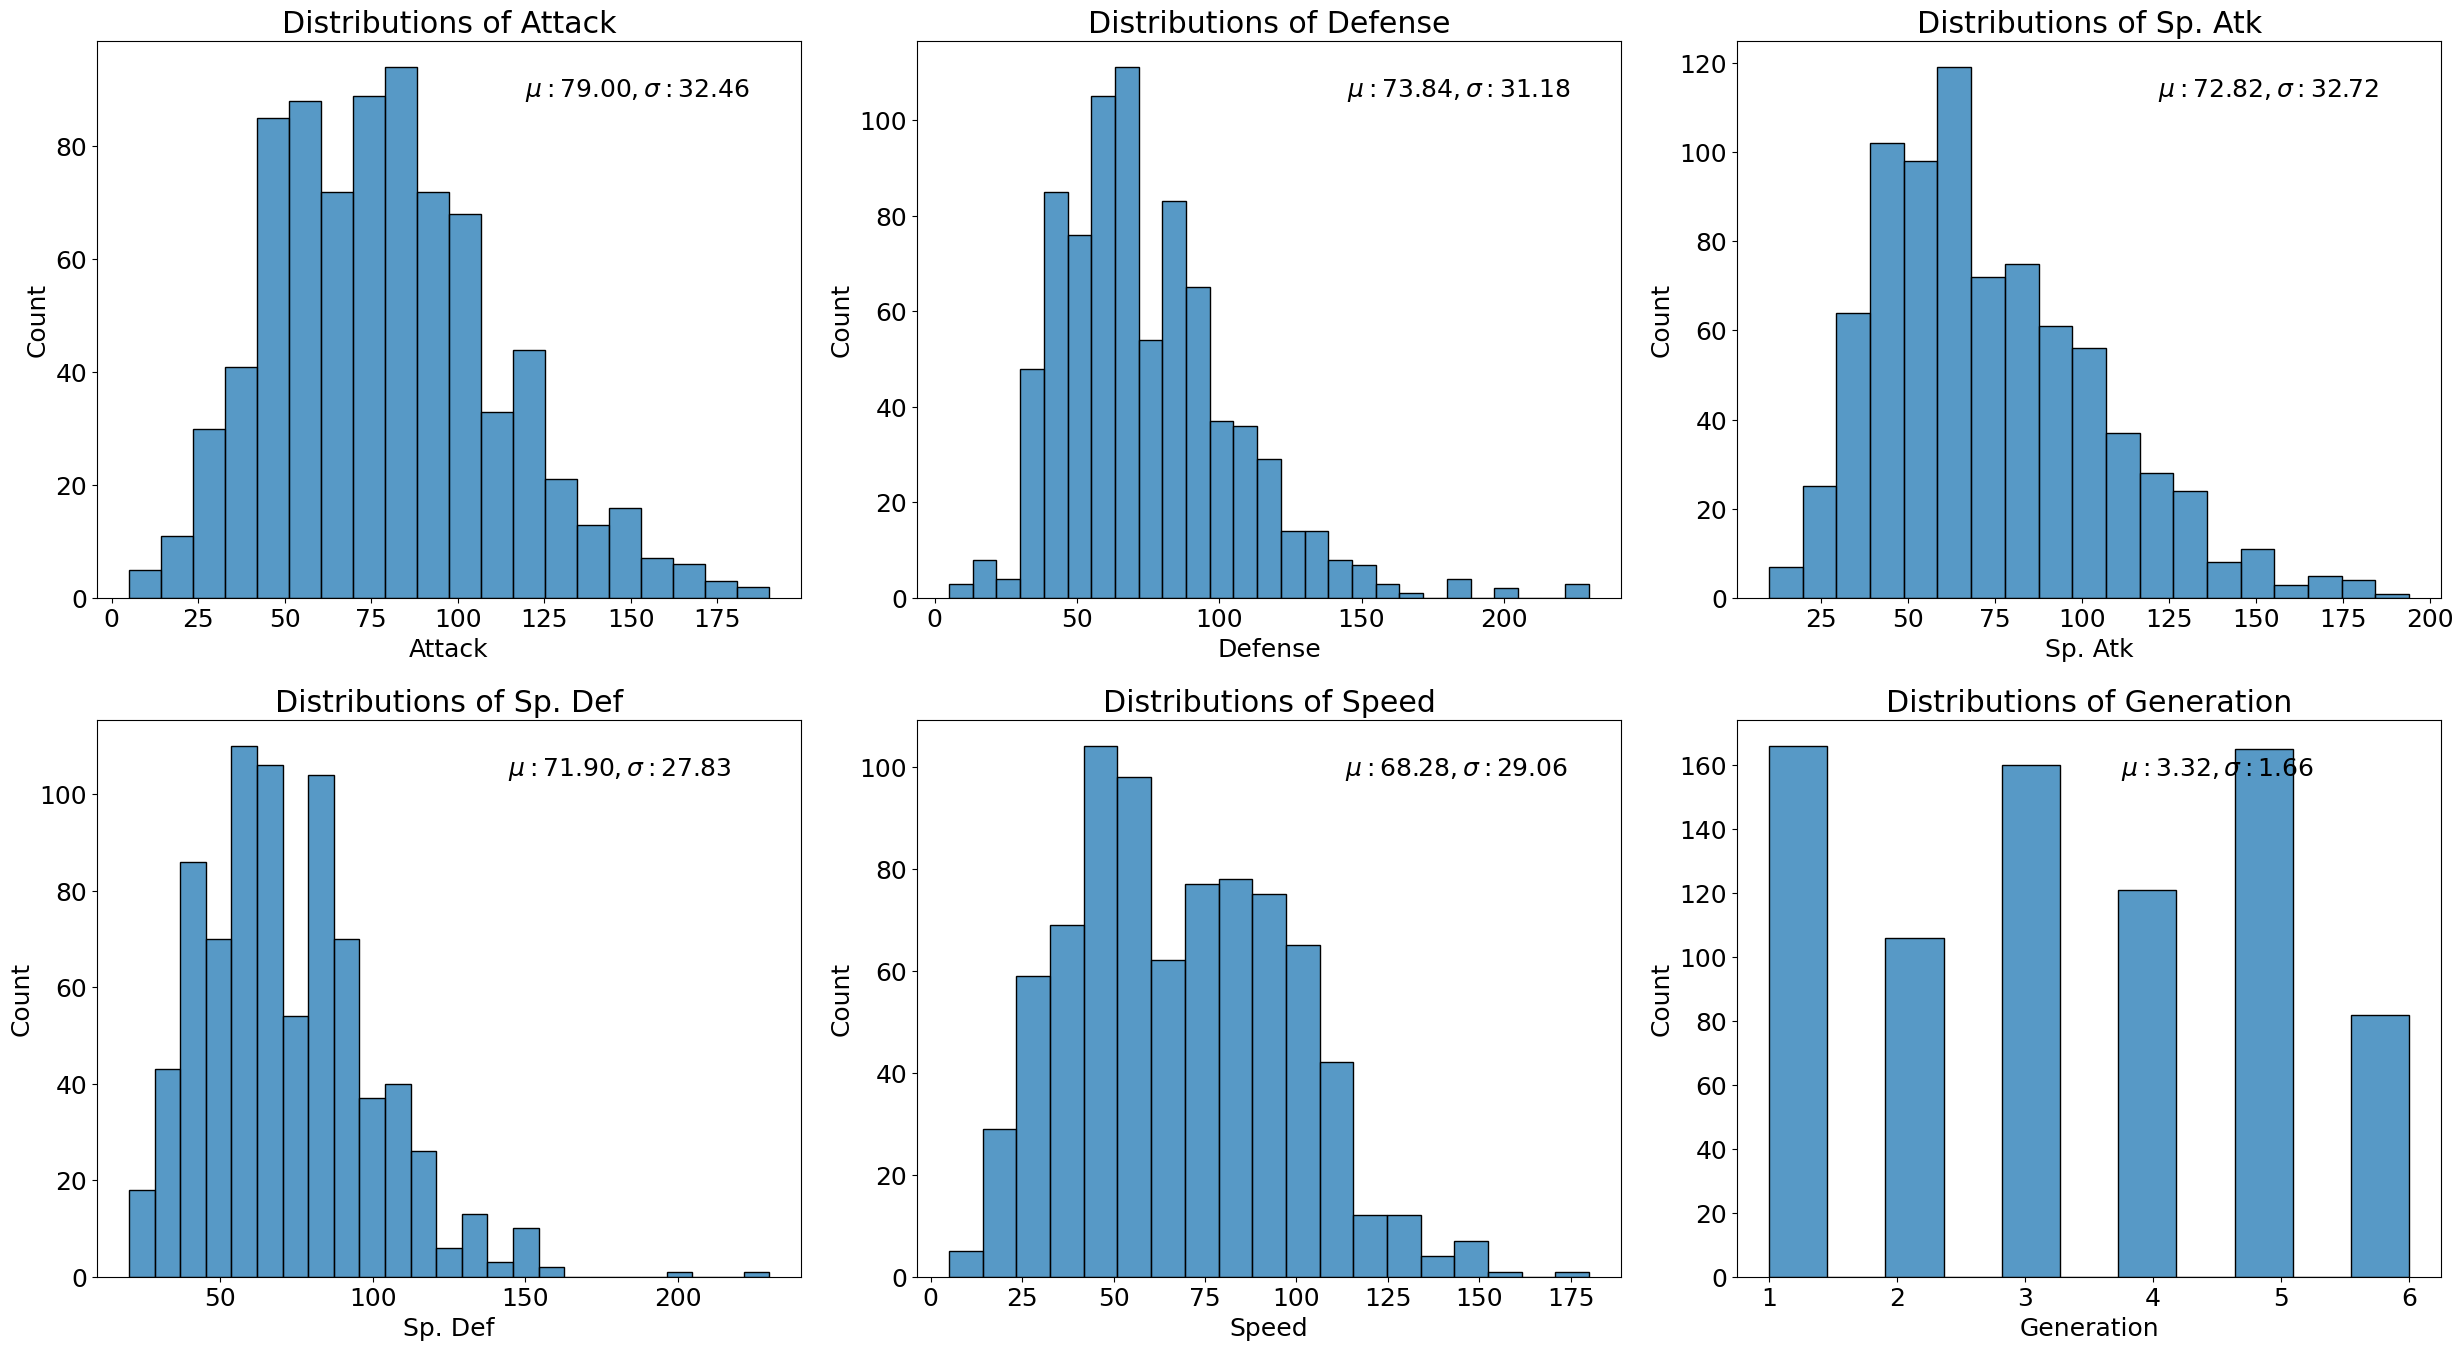

In [86]:
stats = pokemon.columns[5:11]
plt.figure(figsize=(25, 20))

for ii, stat in enumerate(stats):
    title = "Distributions of {stat}".format(
        stat = stat
    )
    plt.subplot(3, 3, ii+1)
    plt.title(title)
    sns.histplot(pokemon[stat])
    x = plt.gca().get_xlim()[1] * .6
    y = plt.gca().get_ylim()[1] * .9
    plt.text(x, y, '$\mu: {mu: .2f}, \sigma: {sigma: .2f}$'.format(mu = pokemon[stat].mean(), sigma=pokemon[stat].std()))
    
    
plt.tight_layout()
plt.show()

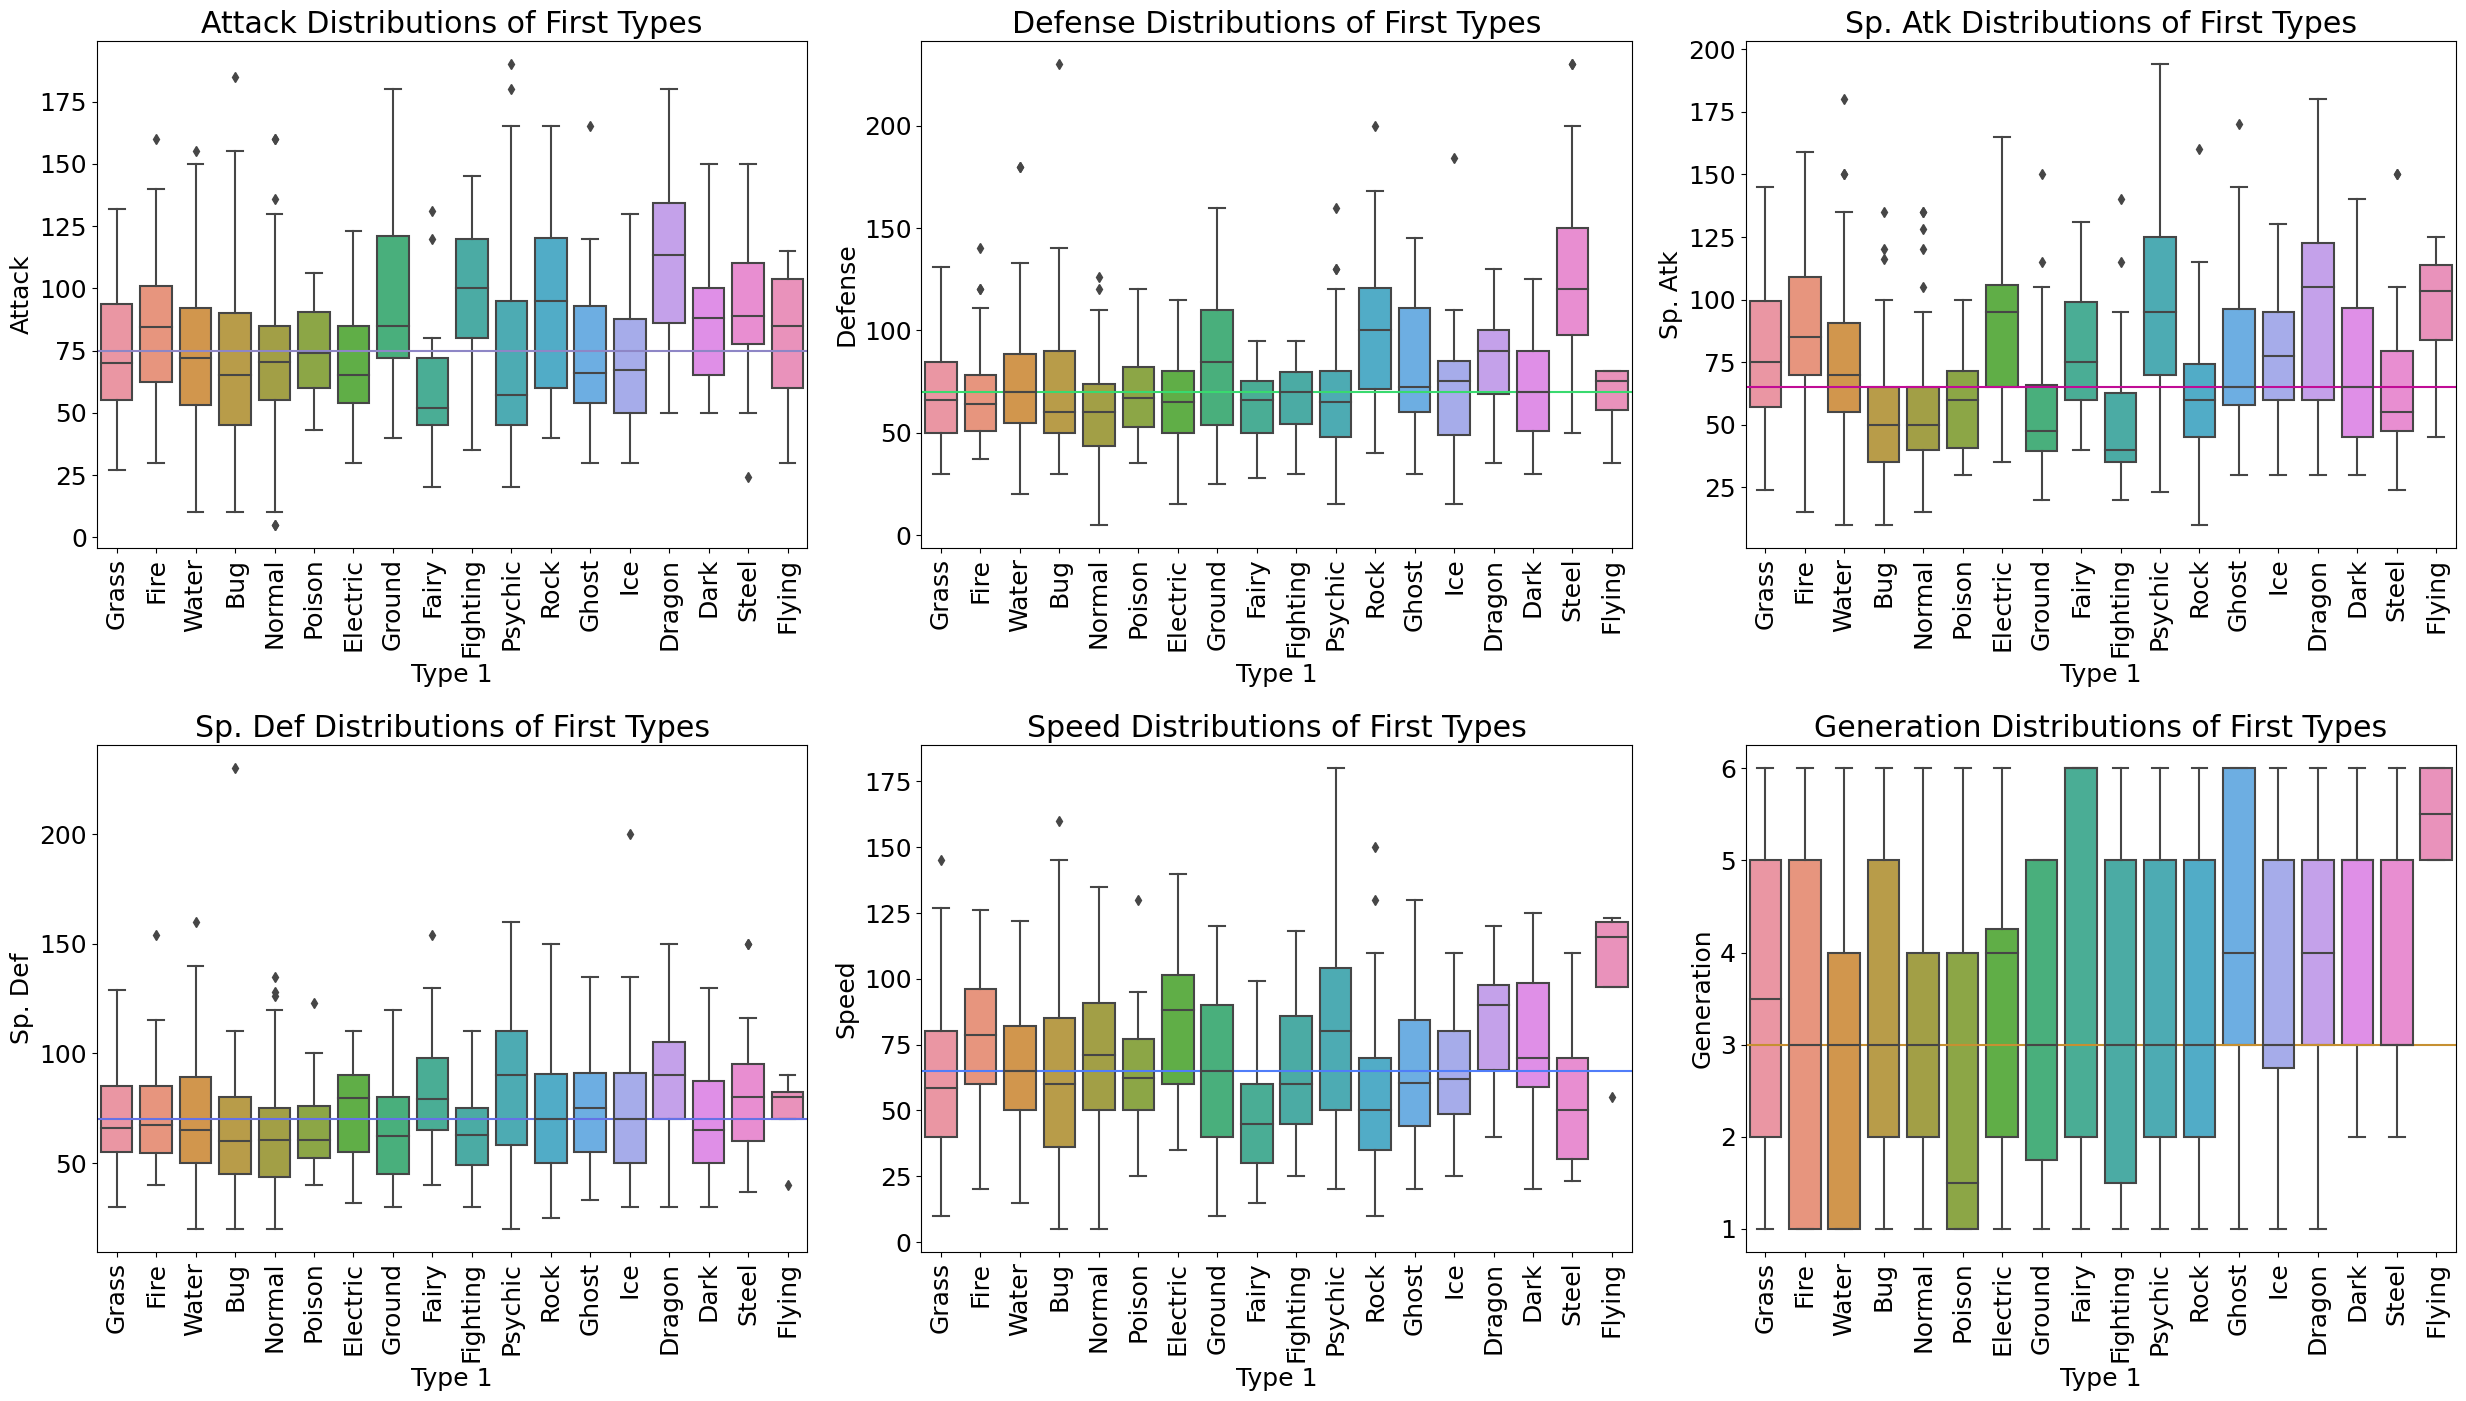

In [87]:
plt.figure(figsize=(25,20))

for ii, stat in enumerate(stats):
    title = "{stat} Distributions of First Types".format(
        stat = stat
    )
    plt.subplot(3, 3, ii+1)
    plt.title(title)
    plt.xticks(rotation=90)
    sns.boxplot(x='Type 1', y=stat, data = pokemon)
    plt.axhline(pokemon[stat].median(), color=np.random.rand(3))
    
plt.tight_layout()
plt.show()

--------
---------


## **Próximos pasos**

Se podrá hacer un clasificador de pokemon?

In [88]:
pokemons = pd.read_csv('https://raw.githubusercontent.com/jhermosillo/DIPLOMADO_CDP/main/02_Analisis_Estadistico/data/pokemon2.csv')
numbers = []
for i in range(1,pokemons.shape[0]+1):
    numbers.append(i)
pokemons['pkn'] = numbers
IMG_DIR = 'C:/Users/beyon/Documents/GitHub/02 Analisis Estadistico/data/pokemon2'
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(IMG_DIR) if isfile(join(IMG_DIR, f))]

In [89]:
import re
dataframe_img = pd.DataFrame([])
images = []
pokemon_number = []
for img in onlyfiles:
    if not re.search('-', img):
        pkn = img.split('.')
        n = re.sub("[^0-9]", "", pkn[0])
        path = IMG_DIR +'/' +str(img)
        images.append(path)
        pokemon_number.append(n)
dataframe_img['images'] = images
dataframe_img['pkn'] = pokemon_number
dataframe_img['pkn'] = dataframe_img['pkn'].astype(int)
dataframe_img['pkn'] = dataframe_img['pkn'].astype(int)
result = pokemons.merge(dataframe_img, left_on='pkn', right_on='pkn')
result.head()

Name  Type1   Type2  pkn  \
0   bulbasaur  Grass  Poison    1   
1     ivysaur  Grass  Poison    2   
2    venusaur  Grass  Poison    3   
3  charmander   Fire     NaN    4   
4  charmeleon   Fire     NaN    5   

                                              images  
0  C:/Users/beyon/Documents/GitHub/02 Analisis Es...  
1  C:/Users/beyon/Documents/GitHub/02 Analisis Es...  
2  C:/Users/beyon/Documents/GitHub/02 Analisis Es...  
3  C:/Users/beyon/Documents/GitHub/02 Analisis Es...  
4  C:/Users/beyon/Documents/GitHub/02 Analisis Es...

Revisamos la cantidad de imágenes que son de tipo Agua, Fuego y Planta

In [94]:
select = ['Water', 'Fire']
result = result[result['Type1'].isin(select)]

x=[result['Type1'].value_counts()]
x

[Water    103
 Fire      47
 Name: Type1, dtype: int64]

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    result, result['Type1'],test_size=0.33, stratify=result['Type1'])

X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.33,stratify=y_test)

In [96]:
y_test.size

33

In [97]:
from shutil import copyfile, copy2

for image,type_  in zip(X_train['images'], y_train):
    copy2(image, 'C:/Users/beyon/Documents/GitHub/02 Analisis Estadistico/data/pokemon2/train/'+type_)

for image,type_ in zip(X_test['images'], y_test):
    copy2(image, 'C:/Users/beyon/Documents/GitHub/02 Analisis Estadistico/data/pokemon2/test/'+type_)
    
for image,type_ in zip(X_val['images'], y_val):
    copy2(image, 'C:/Users/beyon/Documents/GitHub/02 Analisis Estadistico/data/pokemon2/val/'+type_)

In [98]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()

train = datagen.flow_from_directory('C:/Users/beyon/Documents/GitHub/02 Analisis Estadistico/data/pokemon2/train/')
test = datagen.flow_from_directory('C:/Users/beyon/Documents/GitHub/02 Analisis Estadistico/data/pokemon2/test/')
val = datagen.flow_from_directory('C:/Users/beyon/Documents/GitHub/02 Analisis Estadistico/data/pokemon2/val/')

Found 100 images belonging to 2 classes.
Found 33 images belonging to 2 classes.
Found 17 images belonging to 2 classes.


Implementaremos un breve modelo de convolución... 
Más detalles podemos ir empezando a consultar lo siguiente - [Convolución](https://www.aprendemachinelearning.com/como-funcionan-las-convolutional-neural-networks-vision-por-ordenador/)

In [99]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization, Lambda
from keras.preprocessing.image import ImageDataGenerator

def build():
    model = Sequential()
    IMAGE_WIDTH = 256
    IMAGE_HEIGHT = 256
    IMAGE_CHANNELS = 3
    model.add(Lambda(lambda x: x, input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
    model.add(Conv2D(32, (2, 2), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (2, 2), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (2, 2), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax')) 

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

    model.summary()
    return model
model = build()
history = model.fit_generator(train, epochs=30, validation_data=val)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 255, 255, 32)      416       
_________________________________________________________________
batch_normalization (BatchNo (None, 255, 255, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 85, 85, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 84, 84, 64)        8256      
_________________________________________________________________
batch_normalization_1 (Batch (None, 84, 84, 64)        2

4/4 [==============================] - 10s 2s/step - loss: 0.1534 - acc: 0.9800 - val_loss: 0.2785 - val_acc: 0.8824
Epoch 27/30
4/4 [==============================] - 7s 2s/step - loss: 0.0326 - acc: 0.9900 - val_loss: 0.6108 - val_acc: 0.7647
Epoch 28/30
4/4 [==============================] - 7s 2s/step - loss: 0.0688 - acc: 0.9700 - val_loss: 0.8400 - val_acc: 0.7647
Epoch 29/30
4/4 [==============================] - 6s 2s/step - loss: 0.1105 - acc: 0.9600 - val_loss: 0.6990 - val_acc: 0.7647
Epoch 30/30
4/4 [==============================] - 8s 2s/step - loss: 0.0750 - acc: 0.9600 - val_loss: 0.5358 - val_acc: 0.7647


In [100]:
predict = model.predict_generator(test)

Instructions for updating:
Please use Model.predict, which supports generators.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [102]:
def show_wrong_classification(y_test, predict, result):
    tmp = result[result.index.isin(y_test.index)]
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 20))
    i=0
    for imag, true, pred in zip(tmp['images'], tmp['Type1'], predict):
        if true!=pred:
            if i <3:
                img = Image.open(imag)
                fig = plt.figure()
                ax[i].imshow(img)
                ax[i].set_title(str(pred))
                i+=1

In [104]:
from sklearn.metrics import classification_report
predict_frame = pd.DataFrame([])
predict_frame['category'] = np.argmax(predict, axis=-1)
labels = dict((v,k) for k,v in val.class_indices.items())
predict_frame['category'] = predict_frame['category'].replace(labels)
print(classification_report(y_test, predict_frame['category']))

              precision    recall  f1-score   support

        Fire       0.00      0.00      0.00      11.0
       Water       0.00      0.00      0.00      22.0
        fire       0.00      0.00      0.00       0.0
       water       0.00      0.00      0.00       0.0

    accuracy                           0.00      33.0
   macro avg       0.00      0.00      0.00      33.0
weighted avg       0.00      0.00      0.00      33.0



C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



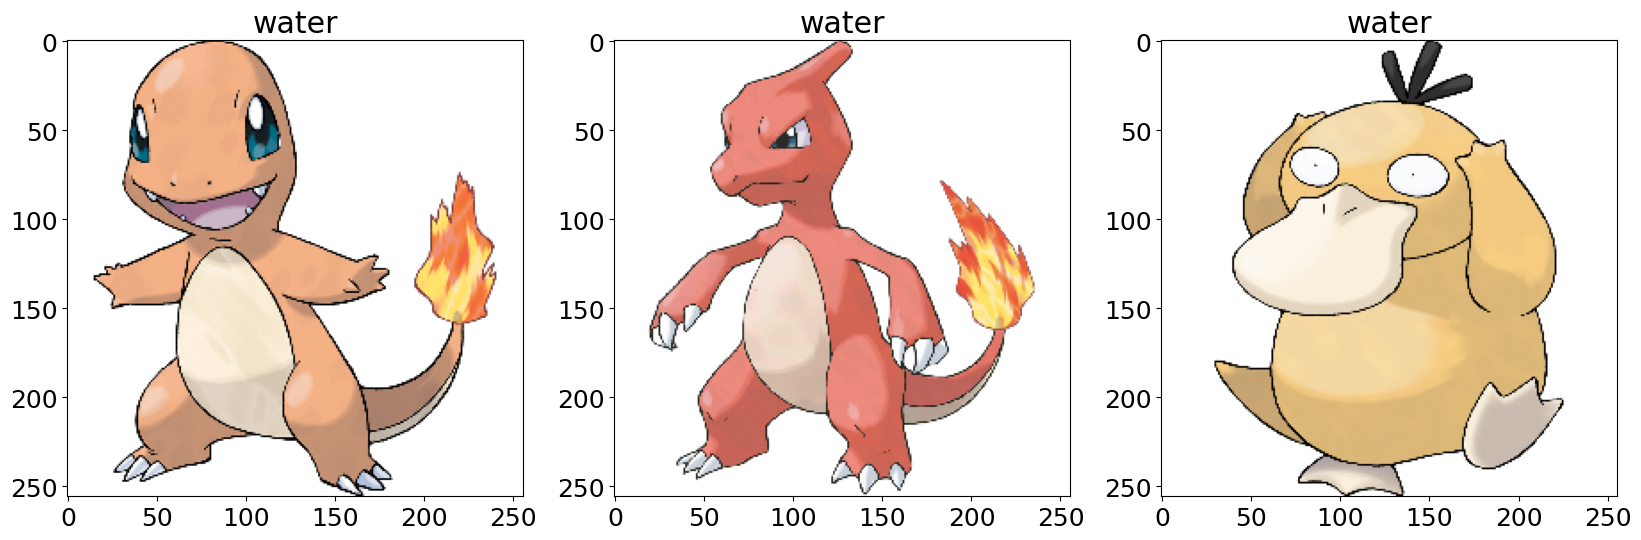

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [105]:
from PIL import Image
show_wrong_classification(y_test, predict_frame['category'], result)

100%|██████████| 2/2 [01:13<00:00, 36.60s/it]


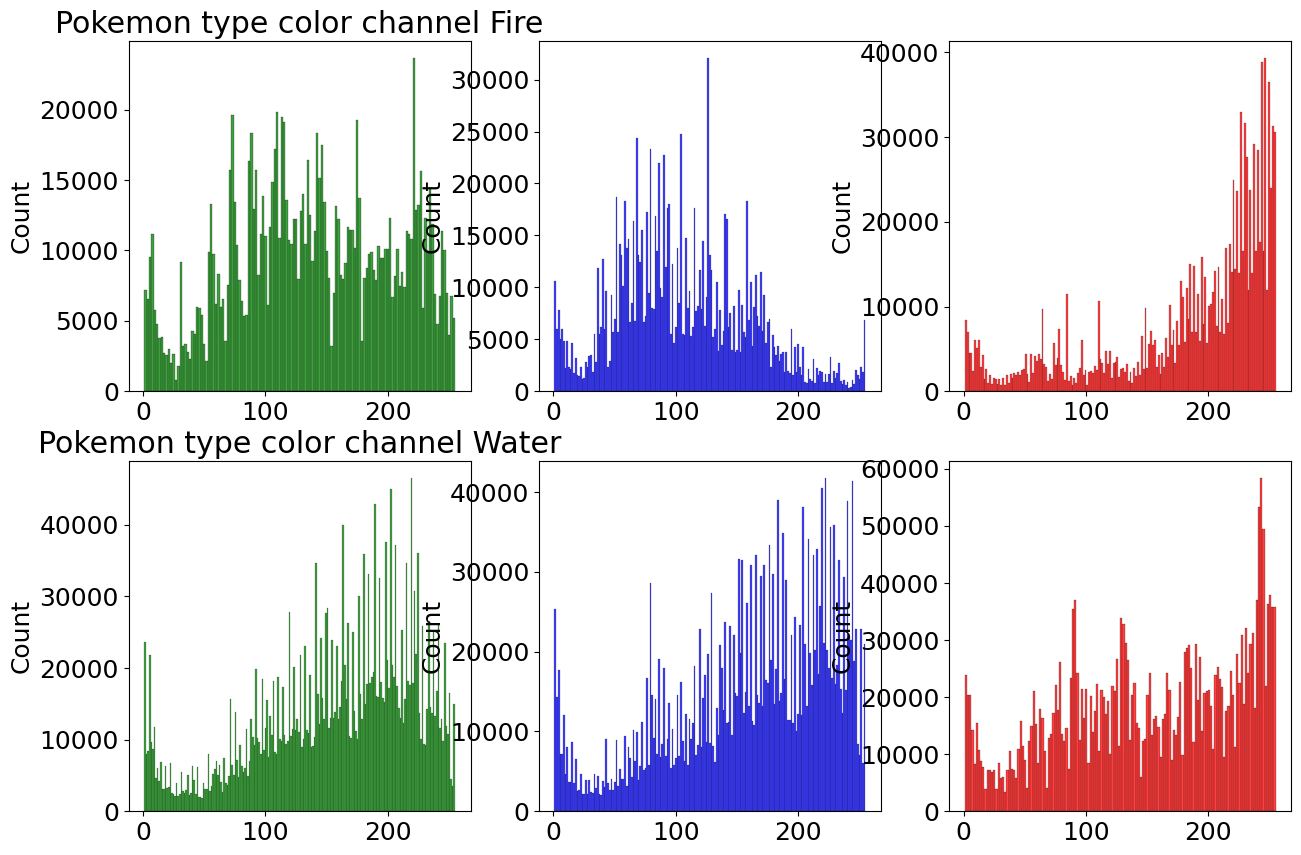

In [106]:

import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,3,figsize=(15,10))
k =0
import cv2
list_b =[]
list_r = []
list_g = []
from tqdm import tqdm
for type_ in tqdm(result['Type1'].unique()):
    tmp = result[result['Type1']==type_]
    for img in tmp['images']:
        img = cv2.imread(img)
        b, g, r = cv2.split(img)
        color = 'blue'
        for i in b:
            for j in i:
                if j != 0:
                    list_b.append(j)
        color = 'green'
        for i in g:
            for j in i:
                if j != 0:
                    list_g.append(j)
        color = 'red'
        for i in r:
            for j in i:
                if j != 0:
                    list_r.append(j)
    sns.histplot(list_g, ax=axes[k, 0], color='g')
    sns.histplot(list_b, ax=axes[k, 1], color='b')
    sns.histplot(list_r, ax=axes[k, 2], color='r')
    axes[k, 0].set_title('Pokemon type color channel ' + type_)
    if type_ =='Fire':
        list_g_f = list_g
        list_b_f = list_b
        list_r_f = list_r
    else:
        list_g_w = list_g
        list_b_w = list_b
        list_r_w = list_r
    list_b =[]
    list_r = []
    list_g = []
    
    k += 1

In [108]:
water = result[result['Type1']=='Water']
stds = []
values = []
for image in water['images']:
    img = cv2.imread(image)
    b, g, r = cv2.split(img)
    for i in r:
        for j in i:
            if j != 0:
                stds.append(j)       
    std = np.mean(np.array(stds), axis=0)
    values.append(std)
    stds = []
water['stds'] = values

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [109]:
water = water.sort_values(by='stds', ascending=False)

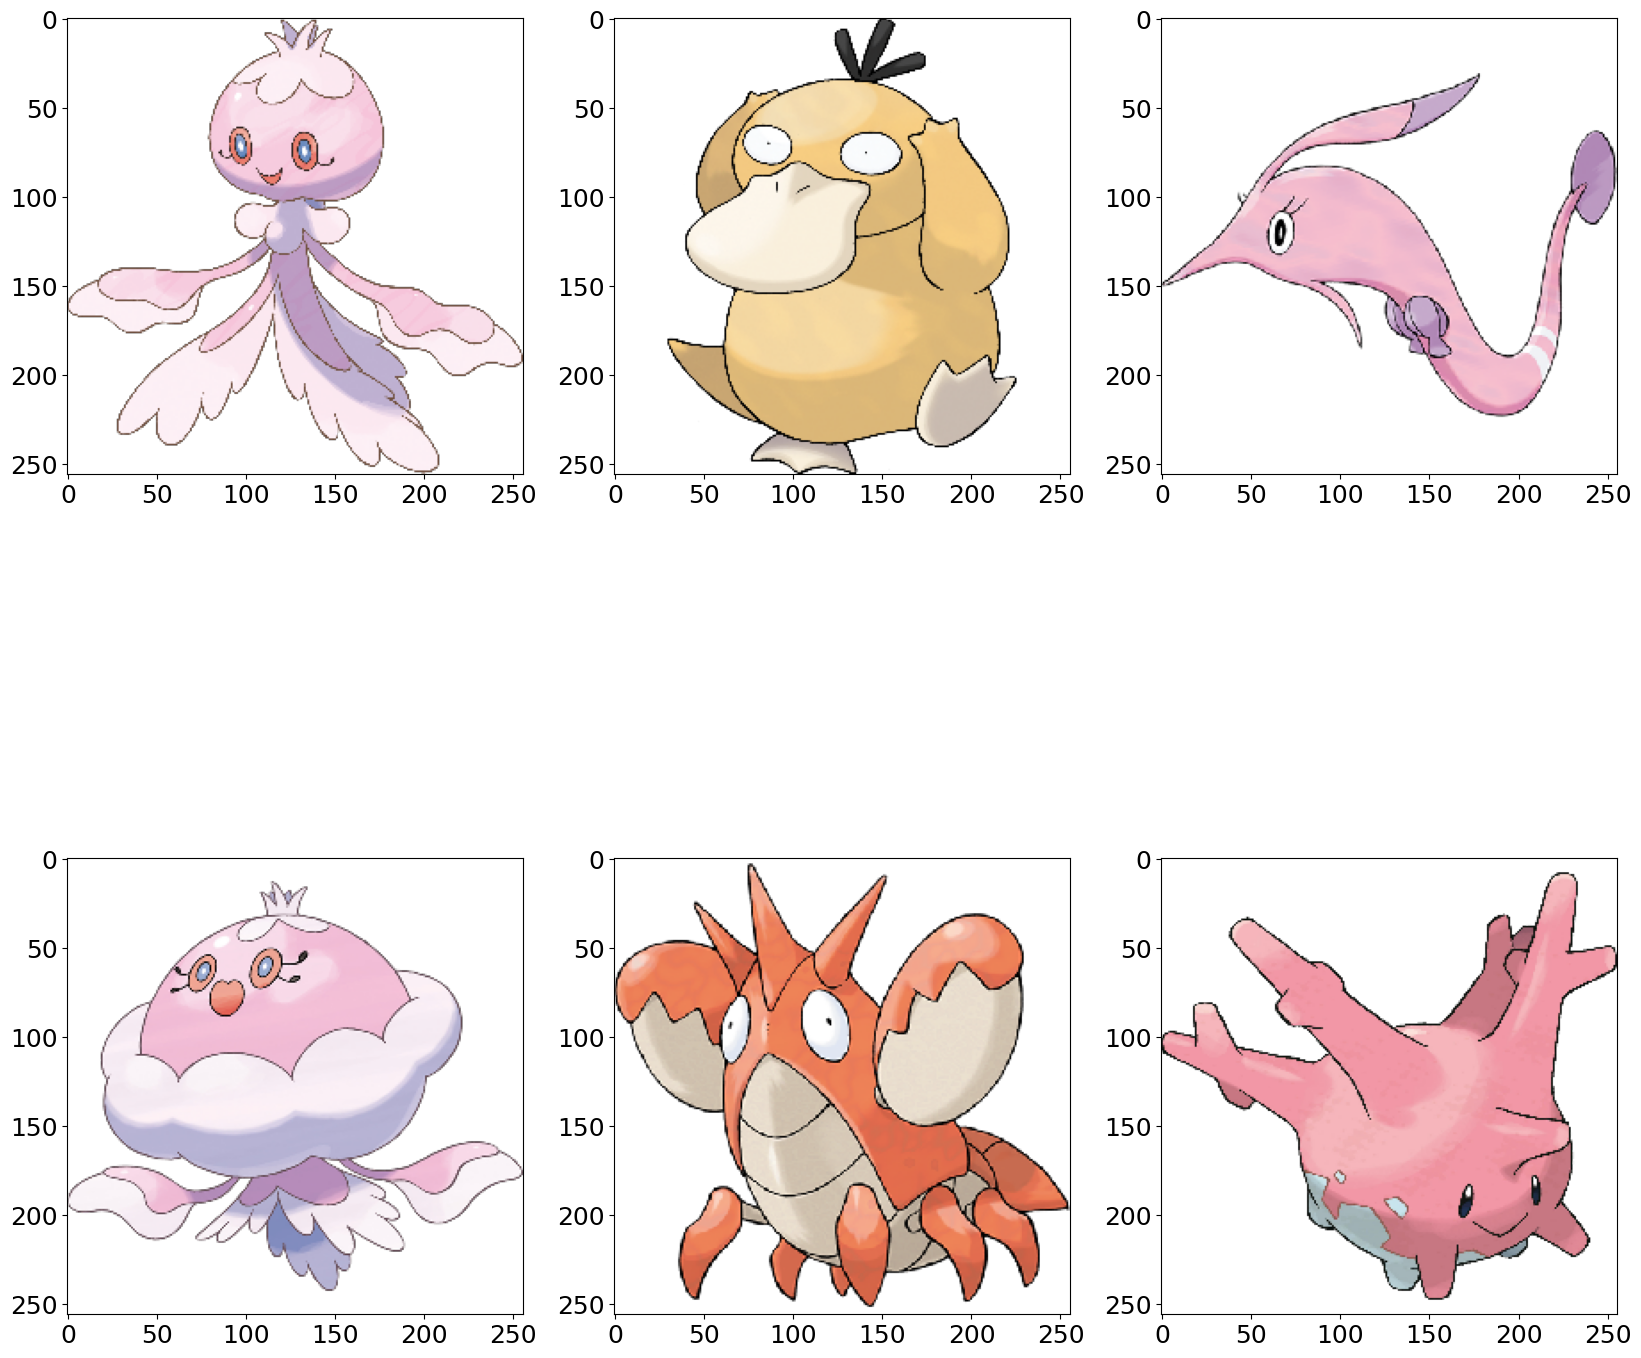

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [110]:
i = 0
j = 0
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 20))
for imag in water['images']:
    if i == 1 and j ==3:
        break
    if j > 2:
        i =1
        j = 0
    img = Image.open(imag)
    fig = plt.figure()
    ax[i][j].imshow(img)
    j+=1

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



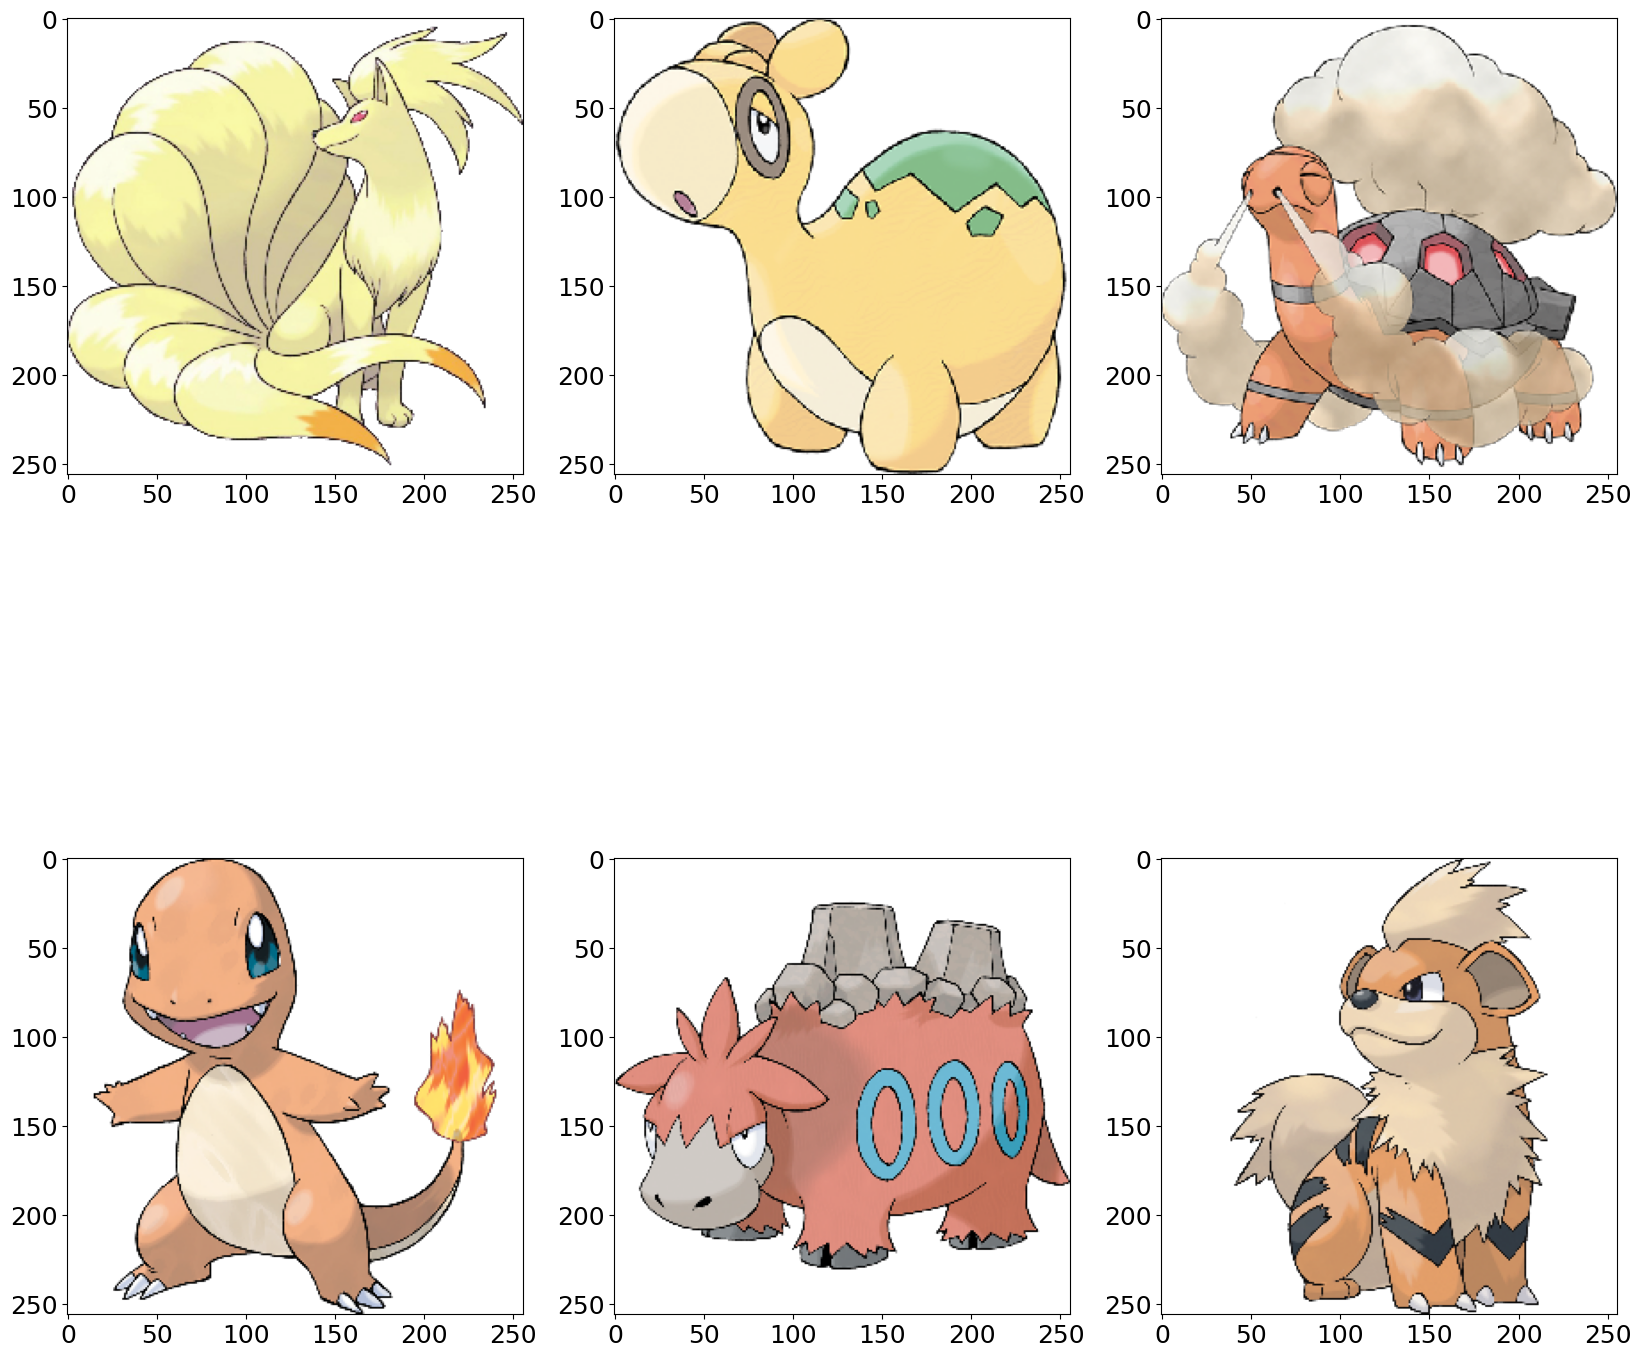

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [111]:
fire = result[result['Type1']=='Fire']
stds = []
values = []
for image in fire['images']:
    img = cv2.imread(image)
    b, g, r = cv2.split(img)
    for i in b:
        for j in i:
            if j != 0:
                stds.append(j)       
    std = np.mean(np.array(stds), axis=0)
    values.append(std)
    stds = []
fire['stds'] = values
fire = fire.sort_values(by='stds', ascending=False)
i = 0
j = 0
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 20))
for imag in fire['images']:
    if i == 1 and j ==3:
        break
    if j > 2:
        i =1
        j = 0
    img = Image.open(imag)
    fig = plt.figure()
    ax[i][j].imshow(img)
    j+=1

## Aumento de datos

    Para intentar mejorar nuestro resultado, aplicaré algo de aumento de imagen.

* brillo


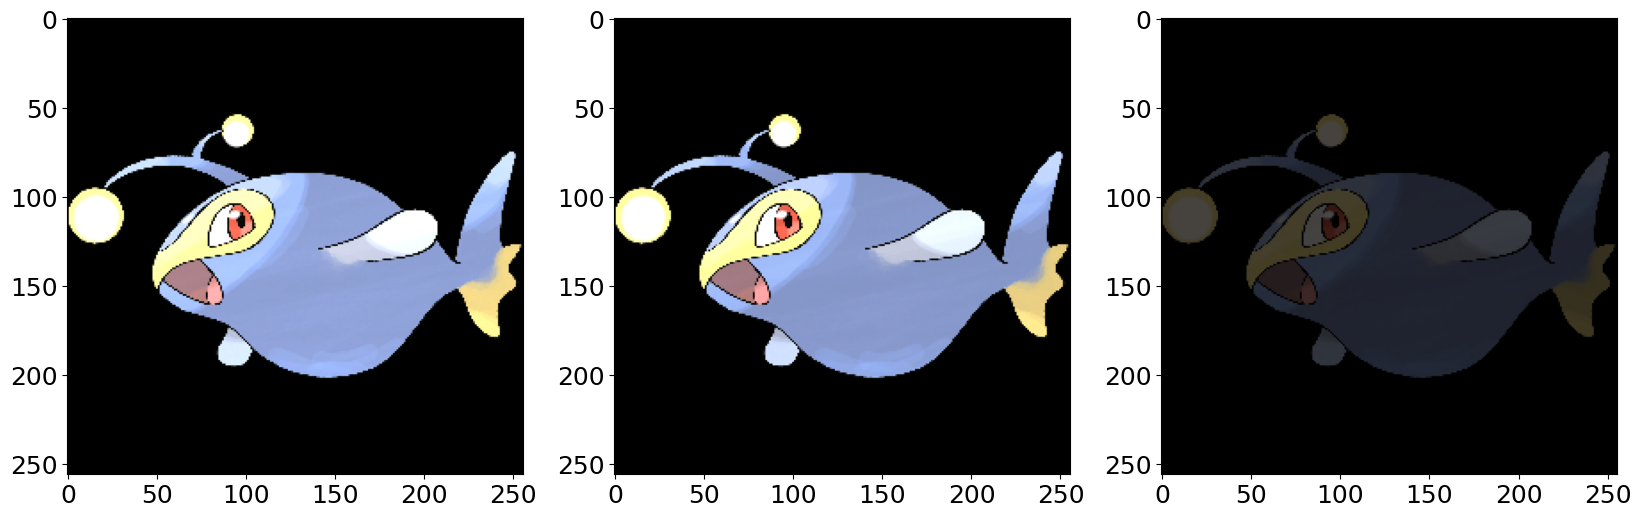

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [112]:
# example of horizontal shift image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
img = load_img(water['images'][170])
data = img_to_array(img)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(brightness_range=[0.2,1.5])
it = datagen.flow(samples, batch_size=1)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 20))
for i in range(3):
    fig = plt.figure()
    batch = it.next()
    image = batch[0].astype('uint8')
    ax[i].imshow(image)
pyplot.show()

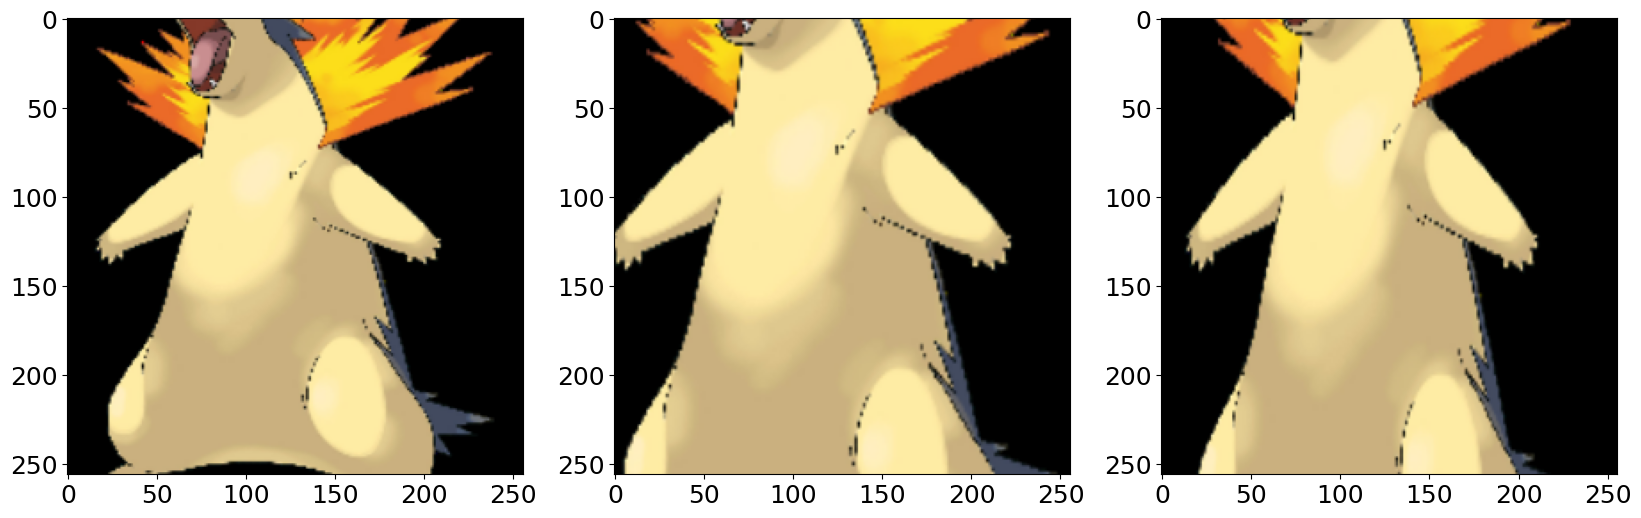

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [113]:
# Zoom
img = load_img(fire['images'][156])
data = img_to_array(img)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(zoom_range=[0.5, 1.0])
it = datagen.flow(samples, batch_size=1)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 20))
for i in range(3):
    fig = plt.figure()
    batch = it.next()
    image = batch[0].astype('uint8')
    ax[i].imshow(image)
pyplot.show()

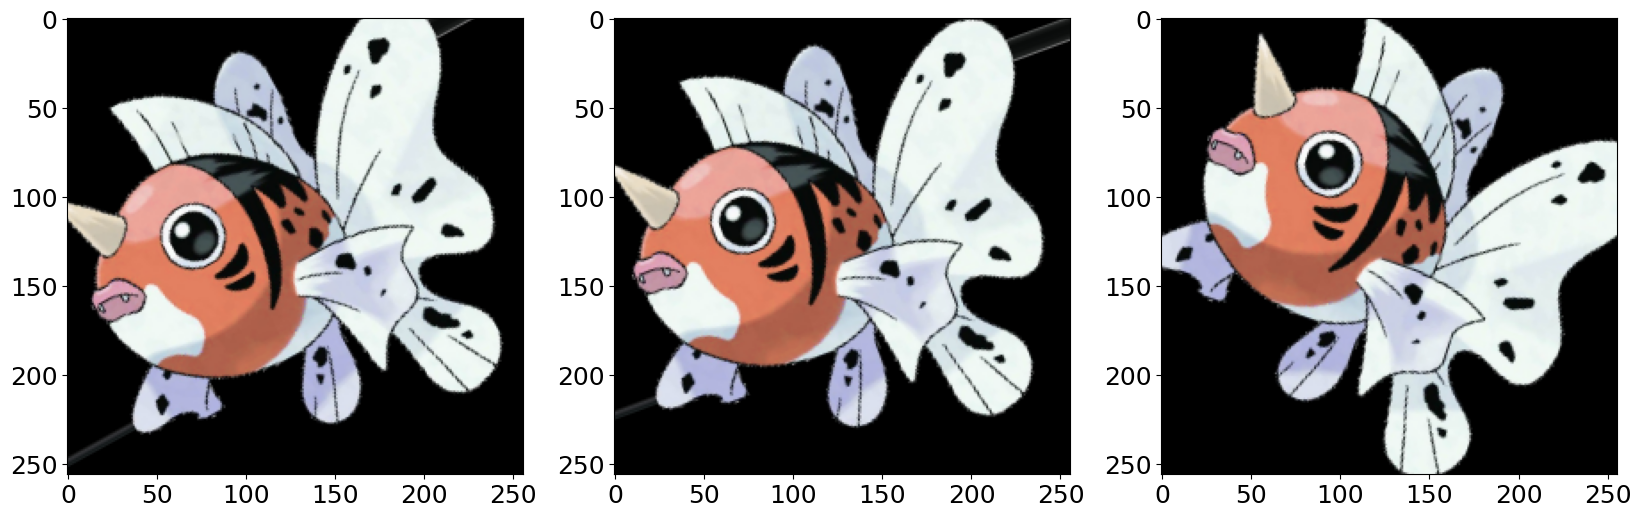

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [114]:
# Rotacion
img = load_img(water['images'][118])
data = img_to_array(img)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(rotation_range=35)
it = datagen.flow(samples, batch_size=1)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 20))
for i in range(3):
    fig = plt.figure()
    batch = it.next()
    image = batch[0].astype('uint8')
    ax[i].imshow(image)
pyplot.show()

In [115]:
datagentrain = ImageDataGenerator(rotation_range=35, 
                                 zoom_range=[0.5, 1.0], 
                                 brightness_range=[0.2,1.5])

datagen = ImageDataGenerator()

train = datagentrain.flow_from_directory('C:/Users/beyon/Documents/GitHub/02 Analisis Estadistico/data/pokemon2/train/')
test = datagen.flow_from_directory('C:/Users/beyon/Documents/GitHub/02 Analisis Estadistico/data/pokemon2/test/')
val = datagen.flow_from_directory('C:/Users/beyon/Documents/GitHub/02 Analisis Estadistico/data/pokemon2/val/')

Found 100 images belonging to 2 classes.
Found 33 images belonging to 2 classes.
Found 17 images belonging to 2 classes.


In [117]:
model = build()
history = model.fit_generator(train, epochs=30, validation_data=val)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 255, 255, 32)      416       
_________________________________________________________________
batch_normalization_4 (Batch (None, 255, 255, 32)      128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 85, 85, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 84, 84, 64)        8256      
_________________________________________________________________
batch_normalization_5 (Batch (None, 84, 84, 64)       

4/4 [==============================] - 10s 2s/step - loss: 0.2109 - acc: 0.9000 - val_loss: 0.0786 - val_acc: 1.0000
Epoch 29/30
4/4 [==============================] - 7s 2s/step - loss: 0.3035 - acc: 0.9200 - val_loss: 0.0869 - val_acc: 0.9412
Epoch 30/30
4/4 [==============================] - 9s 2s/step - loss: 0.3886 - acc: 0.8800 - val_loss: 0.1798 - val_acc: 0.9412


In [118]:
predict_frame = pd.DataFrame([])
predict = model.predict_generator(test)
predict_frame['category'] = np.argmax(predict, axis=-1)
labels = dict((v,k) for k,v in val.class_indices.items())
predict_frame['category'] = predict_frame['category'].replace(labels)
print(classification_report(y_test, predict_frame['category']))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
              precision    recall  f1-score   support

        Fire       0.00      0.00      0.00      11.0
       Water       0.00      0.00      0.00      22.0
        fire       0.00      0.00      0.00       0.0
       water       0.00      0.00      0.00       0.0

    accuracy                           0.00      33.0
   macro avg       0.00      0.00      0.00      33.

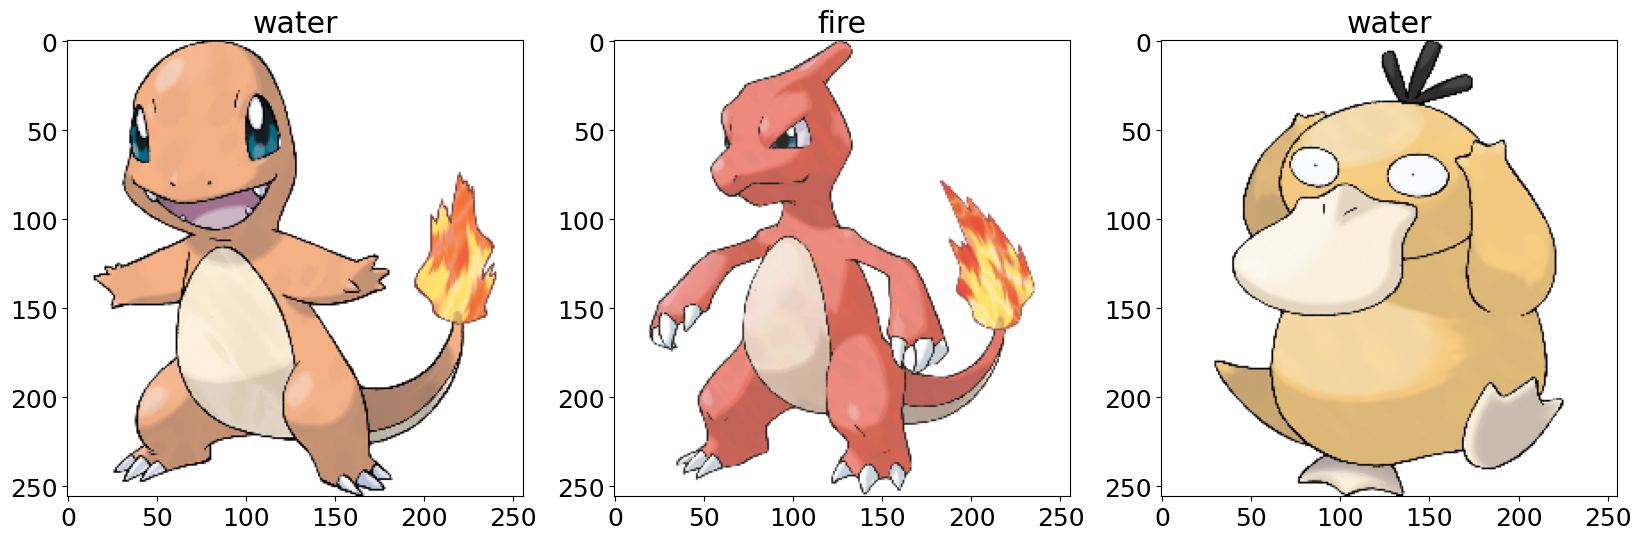

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [119]:
show_wrong_classification(y_test, predict_frame['category'], result)

Por lo tanto, una clasificación de los Pokémon de tipo fuego se ve afectada debido a que el canal rojo de los Pokémon de tipo agua es muy difícil de realizar la clasificación correctamente incluso con el aumento.